In [2]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("./data/data_daily_forecast.csv")

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28919 entries, 0 to 28918
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  28919 non-null  object 
 1   price                       28919 non-null  float64
 2   load_forecast               28910 non-null  float64
 3   solar_production            28919 non-null  float64
 4   wind_production             28919 non-null  float64
 5   temperature_forecast        28919 non-null  float64
 6   capacity_thermal_coal       28919 non-null  float64
 7   border_flow                 28914 non-null  float64
 8   capacity_thermal_gas        28895 non-null  float64
 9   capacity_nuclear            28919 non-null  float64
 10  capacity_hydro              25942 non-null  float64
 11  capacity_thermal_oil        28919 non-null  float64
 12  oil_price                   28895 non-null  float64
 13  coal_price                  288

In [5]:
data.set_index("Unnamed: 0",inplace=True)

In [6]:
data = data.rename(columns={"Unnamed: 0": "Date"})

In [7]:
data.index.names = ['Date']

In [8]:
data.head()

,price,load_forecast,solar_production,wind_production,temperature_forecast,capacity_thermal_coal,border_flow,capacity_thermal_gas,capacity_nuclear,capacity_hydro,capacity_thermal_oil,oil_price,coal_price,nuclear_production,thermal_coal_production,thermal_oil_production,thermal_biomass_production,thermal_gas_production,gas_price
Date,,,,,,,,,,,,,,,,,,,
2020-08-31 00:00:00,29.76,NaN,0.0,12378.4492,14.4,15676.04,NaN,NaN,7994.0,NaN,1646.1,NaN,NaN,8107.0,0.0,400.0,4403.646,10531.198,1.487063
2020-08-31 01:00:00,27.92,NaN,0.0,11102.5674,14.0,15676.04,NaN,NaN,7994.0,NaN,1646.1,NaN,NaN,8107.0,0.0,400.0,4403.646,10557.198,1.487063
2020-08-31 02:00:00,28.89,NaN,0.0,9484.9560,13.7,15676.04,NaN,NaN,7994.0,NaN,1646.1,NaN,NaN,8107.0,0.0,400.0,4403.646,10632.198,1.487063
2020-08-31 03:00:00,28.43,NaN,0.0,8239.8850,13.4,15676.04,NaN,NaN,7994.0,NaN,1646.1,NaN,NaN,8107.0,0.0,400.0,4403.646,10647.198,1.487063
2020-08-31 04:00:00,29.41,NaN,0.0,7431.8440,13.3,15676.04,NaN,NaN,7994.0,NaN,1646.1,NaN,NaN,8107.0,0.0,400.0,4403.646,11321.698,1.487063


In [8]:
df = data[["price"]]

In [46]:
df.index = pd.to_datetime(df.index)

In [10]:
monthly_data = df.resample('M').mean()

C:\Users\Chaitanya Ashtekar\AppData\Local\Temp\ipykernel_16308\2201267011.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = df.resample('M').mean()


<Axes: xlabel='Date'>

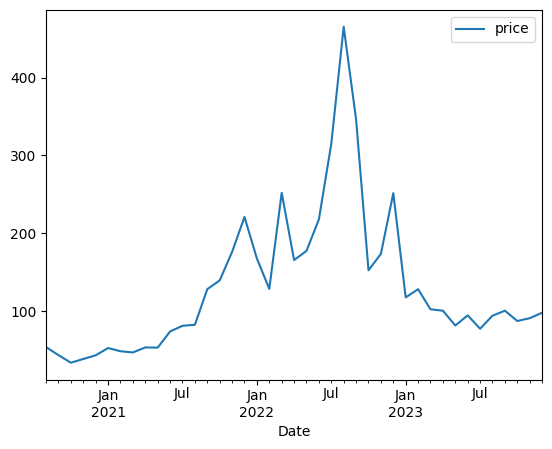

In [11]:
monthly_data.plot()

<Axes: xlabel='Date'>

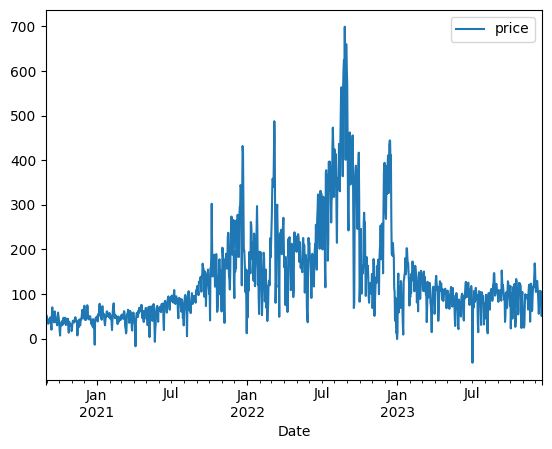

In [12]:
daily_data = df.resample('D').mean()

daily_data.plot()

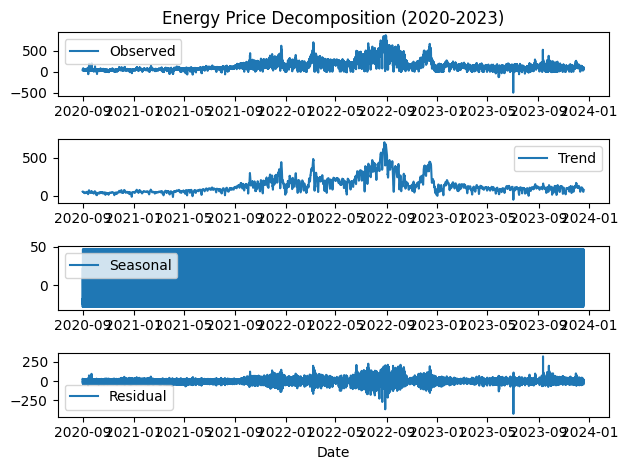

In [13]:
result = seasonal_decompose(df['price'], model='additive', period=24)  # Assuming hourly data with a daily seasonality

plt.subplot(4, 1, 1)
plt.plot(df.index, result.observed, label='Observed')
plt.legend()
plt.title('Energy Price Decomposition (2020-2023)')

plt.subplot(4, 1, 2)
plt.plot(df.index, result.trend, label='Trend')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(df.index, result.seasonal, label='Seasonal')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(df.index, result.resid, label='Residual')
plt.legend()

plt.xlabel('Date')
plt.tight_layout()
plt.show()

In [9]:
def season_calc(month):
    """adding season based on the data 
       months from June to October are denoted as 'summer' and months from November to May as 'winter'. """
    if month in [6,7,8,9,10]:
        return "summer"
    else:
        return "winter"

In [15]:
weekdays = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3: 'Thursday', 4: 'Friday', 5:'Saturday', 6:'Sunday'}
df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.day
df['hour'] = df.index.hour
df['weekday'] = df.index.weekday.map(weekdays)
df['season'] = df.month.apply(season_calc)

C:\Users\Chaitanya Ashtekar\AppData\Local\Temp\ipykernel_16308\4201002093.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df.index.year
C:\Users\Chaitanya Ashtekar\AppData\Local\Temp\ipykernel_16308\4201002093.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month
C:\Users\Chaitanya Ashtekar\AppData\Local\Temp\ipykernel_16308\4201002093.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

In [16]:
df.head()

,price,year,month,day,hour,weekday,season
Date,,,,,,,
2020-08-31 00:00:00,29.76,2020,8,31,0,Monday,summer
2020-08-31 01:00:00,27.92,2020,8,31,1,Monday,summer
2020-08-31 02:00:00,28.89,2020,8,31,2,Monday,summer
2020-08-31 03:00:00,28.43,2020,8,31,3,Monday,summer
2020-08-31 04:00:00,29.41,2020,8,31,4,Monday,summer


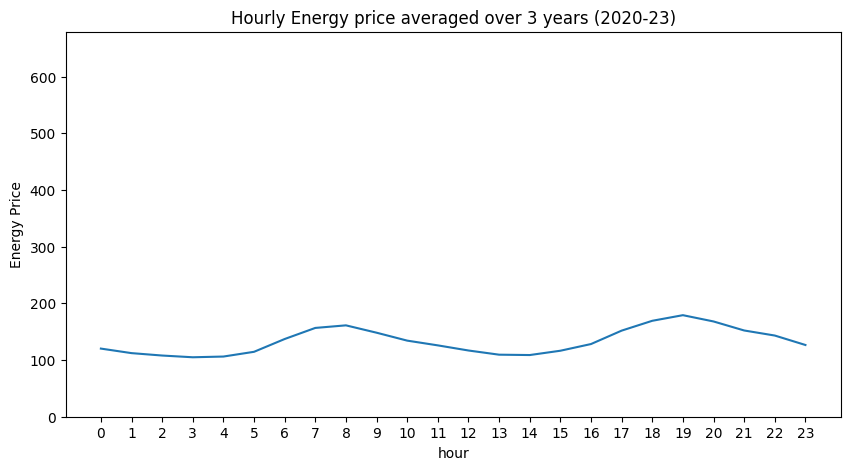

In [17]:
df.groupby('hour')['price'].mean().plot(figsize = (10,5))
_ = plt.ylabel('Energy Price')
_ = plt.ylim([0, max(df.groupby('hour')['price'].mean()) + 500])
_ = plt.xticks(df['hour'].unique())
_ = plt.title('Hourly Energy price averaged over 3 years (2020-23)')

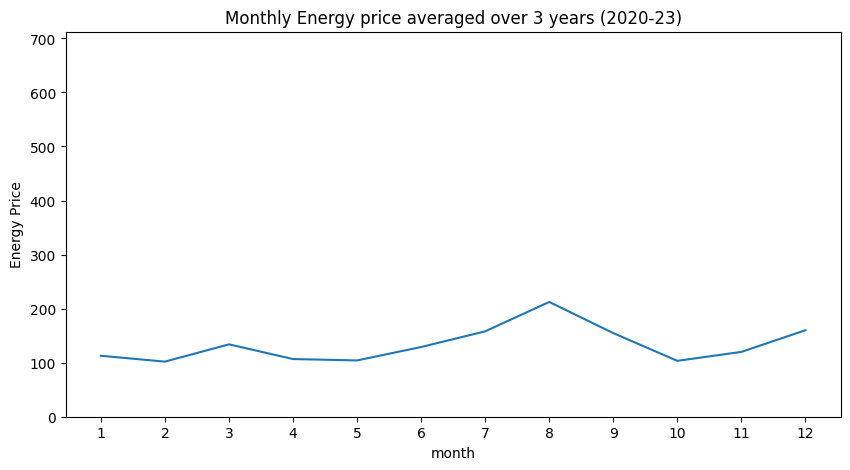

In [18]:
df.groupby('month')['price'].mean().plot(figsize = (10,5))
_ = plt.ylabel('Energy Price')
_ = plt.ylim([0, max(df.groupby('month')['price'].mean()) + 500])
_ = plt.xticks(df['month'].unique())
_ = plt.title('Monthly Energy price averaged over 3 years (2020-23)')

In [19]:
hour_weekday = df.pivot_table(values='price', index='hour', columns = 'weekday', aggfunc = 'mean')

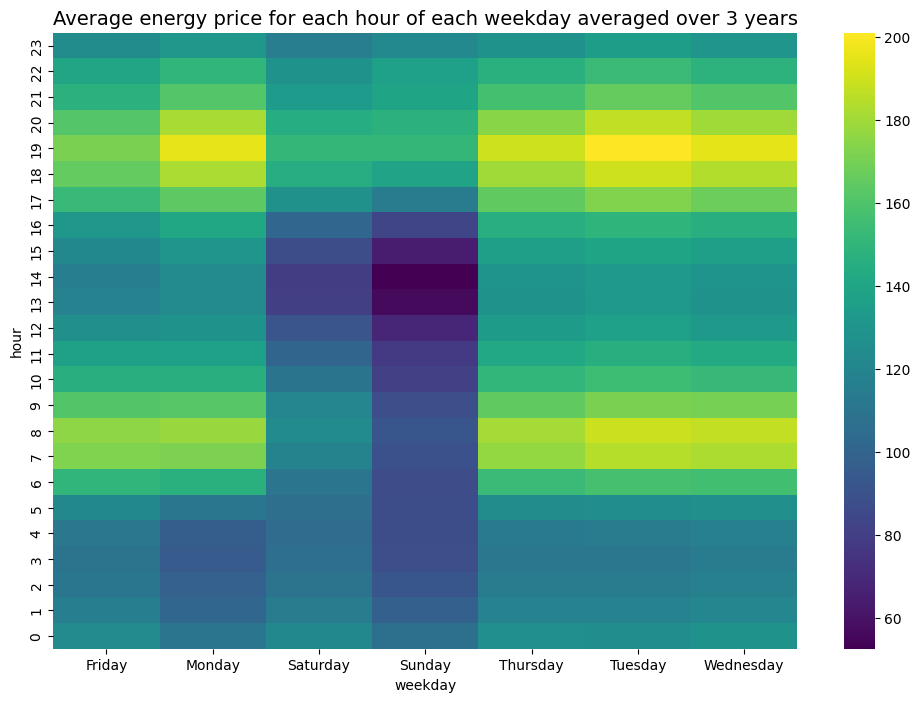

In [20]:
import seaborn as sns

_ = plt.figure(figsize=(12, 8))
ax = sns.heatmap(hour_weekday.sort_index(ascending = False), cmap='viridis')
_ = ax.set_title("Average energy price for each hour of each weekday averaged over 3 years", fontsize = 14)

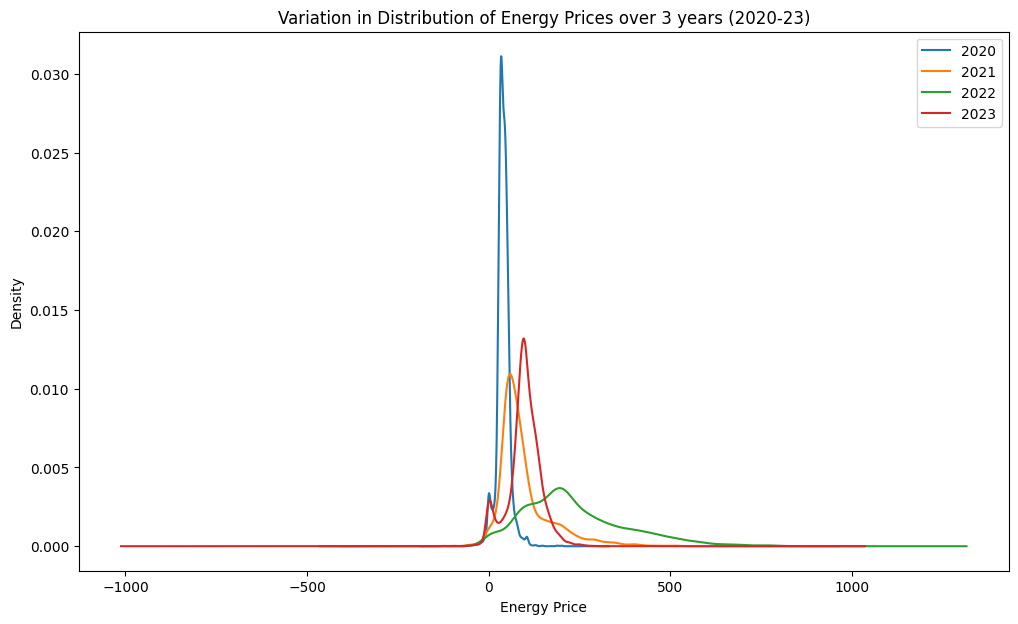

In [21]:
for year in df['year'].unique():
    df[df['year'] == year]['price'].plot(kind='density', figsize = (12,7), legend = True, label = year)
_ = plt.xlabel('Energy Price')
_ = plt.title('Variation in Distribution of Energy Prices over 3 years (2020-23)')

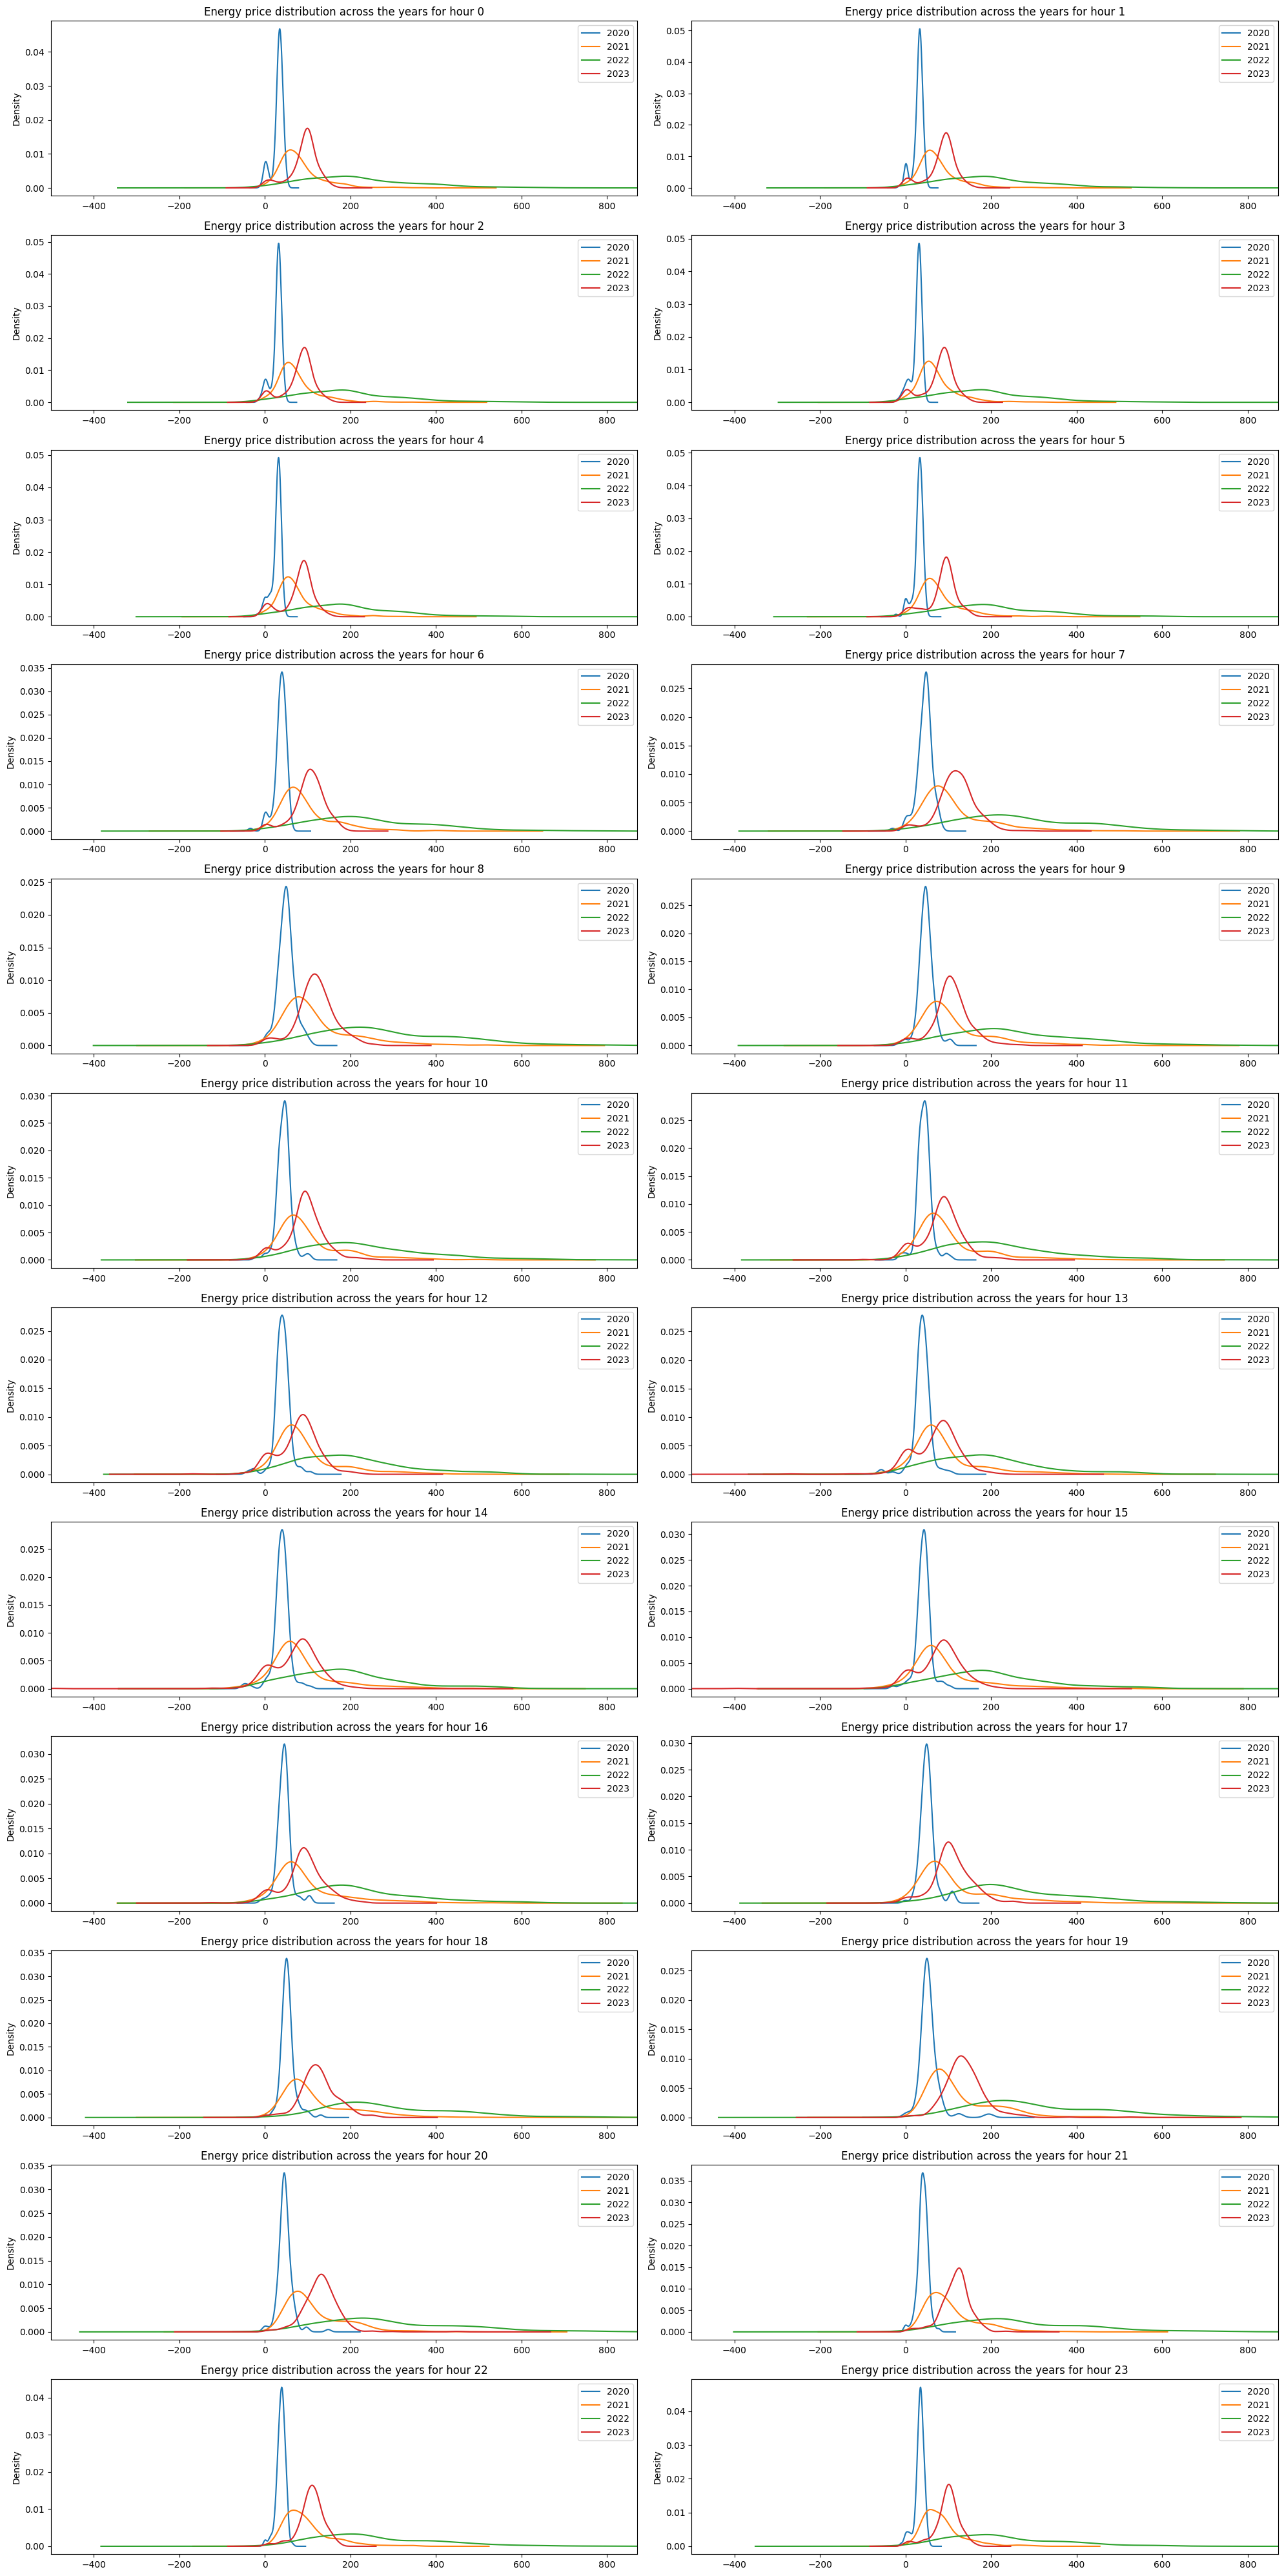

In [22]:
f = plt.figure(figsize = (20,40))
peak_hours = np.arange(0,24) 
for i, hour in enumerate(peak_hours):
    ax = f.add_subplot(12,2,i+1)
    for j, year in enumerate(df['year'].unique()):
        df[(df['year'] == year) & (df['hour'] == hour)]['price'].\
                                plot(kind='density',  sharey=False, legend=True, label= year)# ,\
                                #c = color_names[j])
    plt.title('Energy price distribution across the years for hour '+str(hour))
    plt.xlim(np.min(df.price.values), np.max(df.price.values))
plt.tight_layout()

In [27]:
df.columns

Index(['price', 'year', 'month', 'day', 'hour', 'weekday', 'season',
       'temperature'],
      dtype='object')

In [24]:
data = data.reset_index()

df["temperature"] = data.temperature_forecast

In [29]:
data.index.names = ['Date']

In [30]:
data.index = pd.to_datetime(data.index)

In [33]:
data = data.drop(columns=["Date"])

In [34]:
result = data.corr()

correlation_with_target = result.iloc[1:, 0]

# Sort the correlation values in descending order
sorted_correlation = correlation_with_target.abs().sort_values(ascending=False)

# Select the top 5 features
top_5_features = sorted_correlation.head(5)

# Display the top 5 features
print("Top 5 features based on correlation with the target:")
print(top_5_features)

Top 5 features based on correlation with the target:
gas_price                  0.810803
coal_price                 0.719654
oil_price                  0.558598
capacity_thermal_oil       0.471196
thermal_coal_production    0.430860
Name: price, dtype: float64


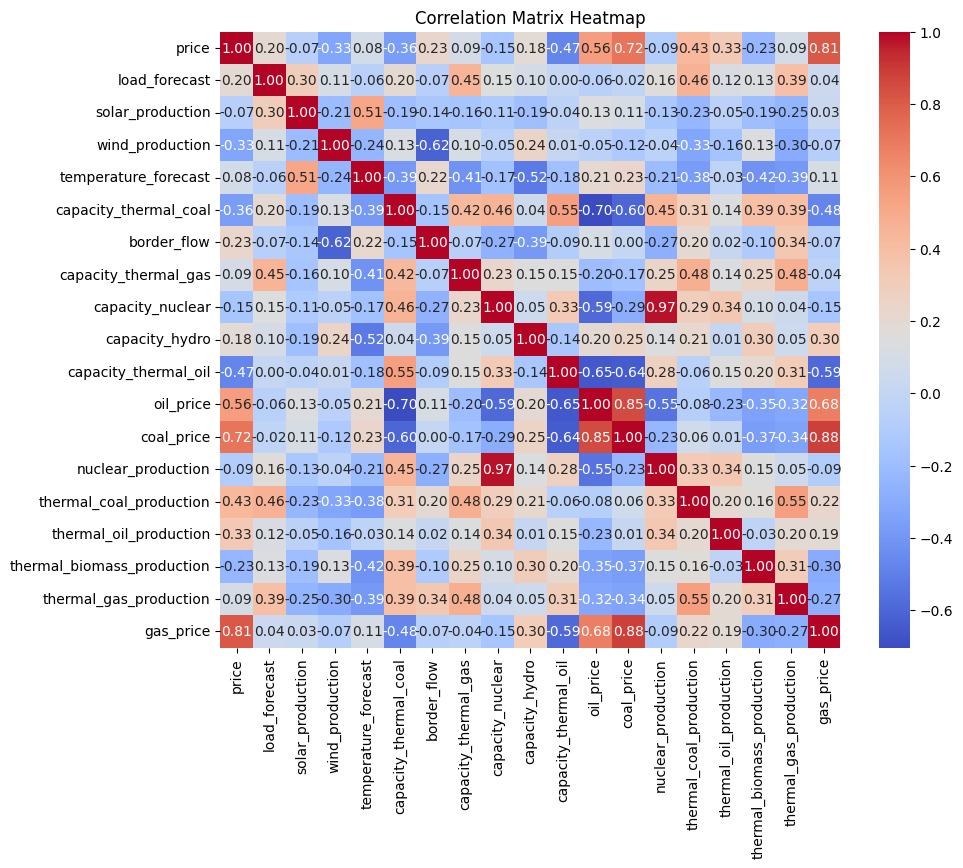

In [35]:
plt.figure(figsize=(10, 8))
sns.heatmap(result, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap") 
plt.show()

**Plotting a linear regression plot between the energy price and temperature**

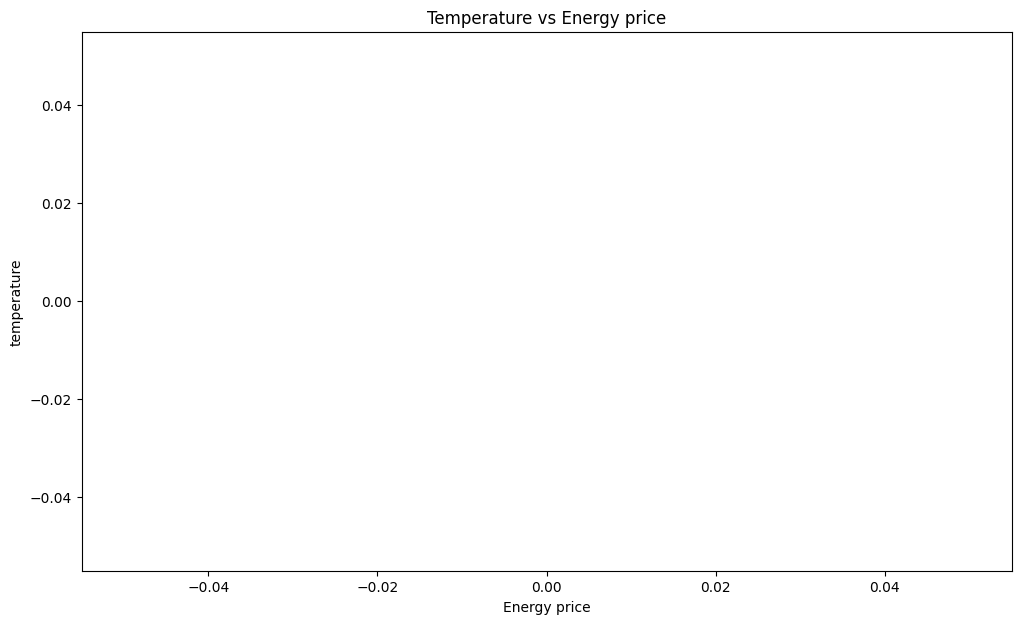

In [36]:
_ = plt.figure(figsize=(12,7))
seasons = ['summer', "winter"] 
hours = np.arange(0,23) 
_ = sns.regplot(x= 'price', y= 'temperature' , data= \
            df[(df['season'].isin(seasons)) & (df['hour'].isin(hours))]) 
_ = plt.xlabel('Energy price')
_ = plt.title('Temperature vs Energy price')

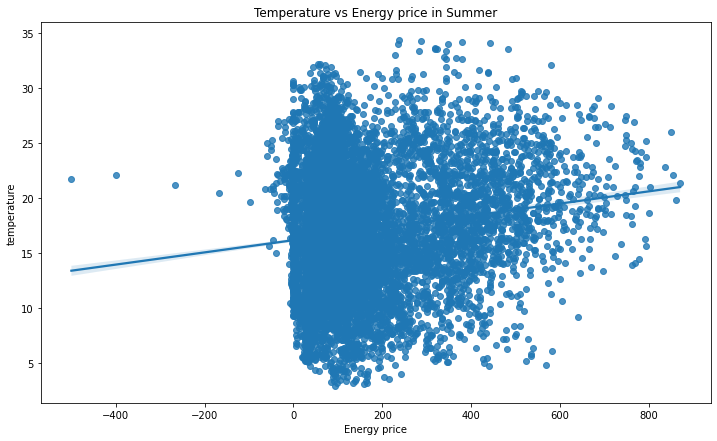

In [ ]:
_ = plt.figure(figsize=(12,7))
seasons = ['summer', "winter"] 
hours = np.arange(0,23) 
_ = sns.regplot(x= 'price', y= 'temperature' , data= \
            df[(df['season'] == seasons[0]) & (df['hour'].isin(hours))]) 
_ = plt.xlabel('Energy price')
_ = plt.title('Temperature vs Energy price in Summer')

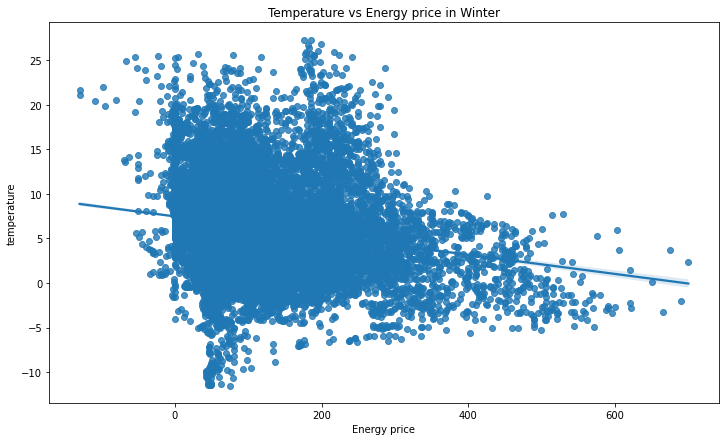

In [ ]:
_ = plt.figure(figsize=(12,7))
seasons = ['summer', "winter"] 
hours = np.arange(0,23) 
_ = sns.regplot(x= 'price', y= 'temperature' , data= \
            df[(df['season'] == seasons[1]) & (df['hour'].isin(hours))]) 
_ = plt.xlabel('Energy price')
_ = plt.title('Temperature vs Energy price in Winter')

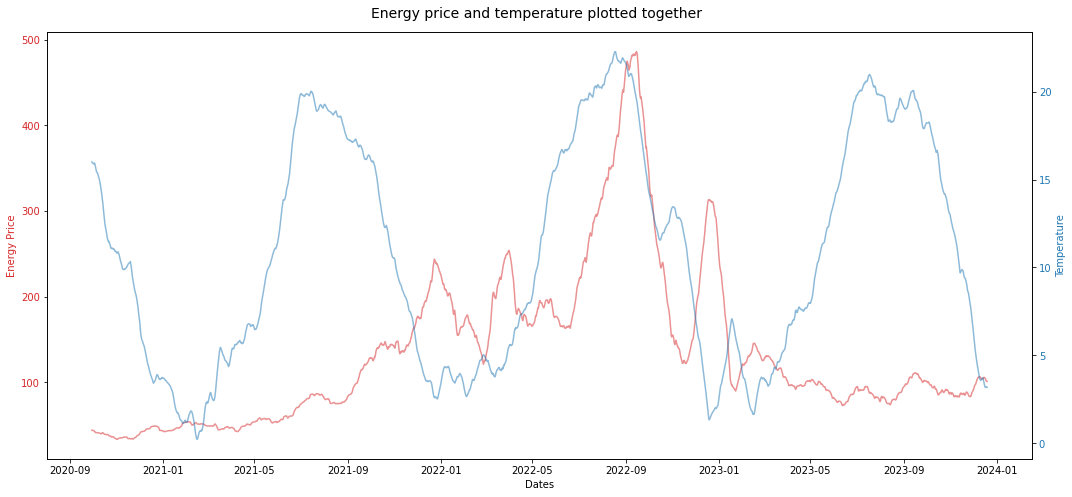

In [ ]:
fig, ax1 = plt.subplots(figsize=(15,7))
rolling_num = 24*30
color = 'tab:red'
ax1.set_xlabel('Dates')
ax1.set_ylabel('Energy Price', color = color)
ax1.plot(df["price"].rolling(rolling_num).mean(), color = color, alpha = 0.5)        
ax1.tick_params(axis='y', labelcolor = color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Temperature', color = color)  # we already handled the x-label with ax1
ax2.plot(df["temperature"].rolling(rolling_num).mean(), color = color, alpha = 0.5)   
ax2.tick_params(axis='y', labelcolor = color)

fig.suptitle('Energy price and temperature plotted together', fontsize = 14)
fig.tight_layout()
plt.show()

**Exploring effect of wind production on energy price**

In [ ]:
data = data.reset_index()

df["wind_production"] = data["wind_production"]

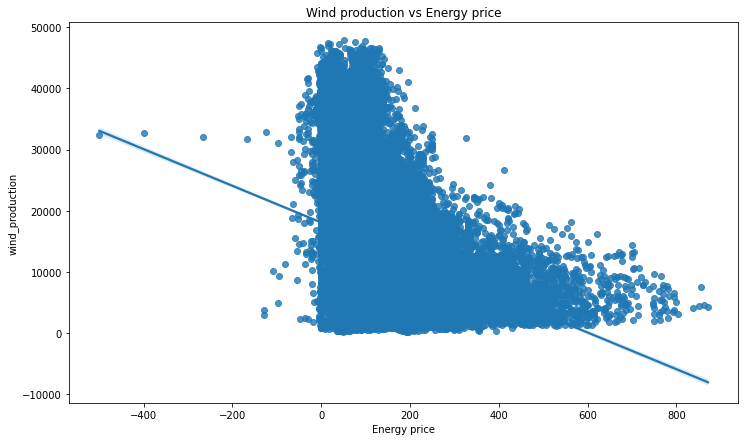

In [ ]:
_ = plt.figure(figsize=(12,7))
seasons = ['summer', "winter"] 
hours = np.arange(0,23) 
_ = sns.regplot(x= data['price'], y= data['wind_production'] , data= \
            df[(df['season'].isin(seasons)) & (df['hour'].isin(hours))]) 
_ = plt.xlabel('Energy price')
_ = plt.title('Wind production vs Energy price')

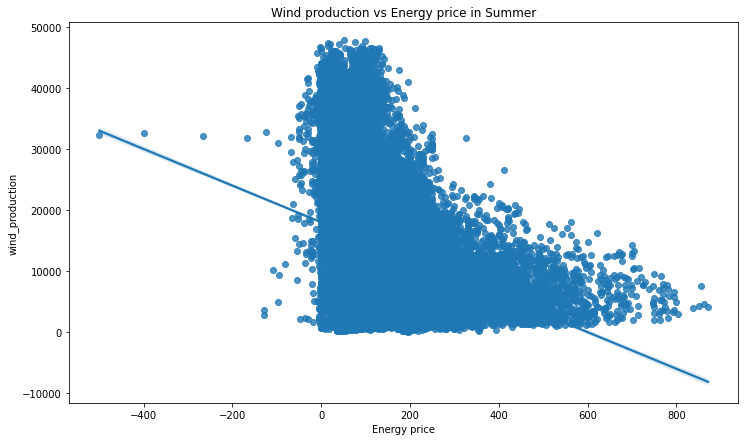

In [ ]:
_ = plt.figure(figsize=(12,7))
seasons = ['summer', "winter"] 
hours = np.arange(0,23) 
_ = sns.regplot(x= data['price'], y= data['wind_production'] , data= \
            df[(df['season'] == seasons[0]) & (df['hour'].isin(hours))]) 
_ = plt.xlabel('Energy price')
_ = plt.title('Wind production vs Energy price in Summer')

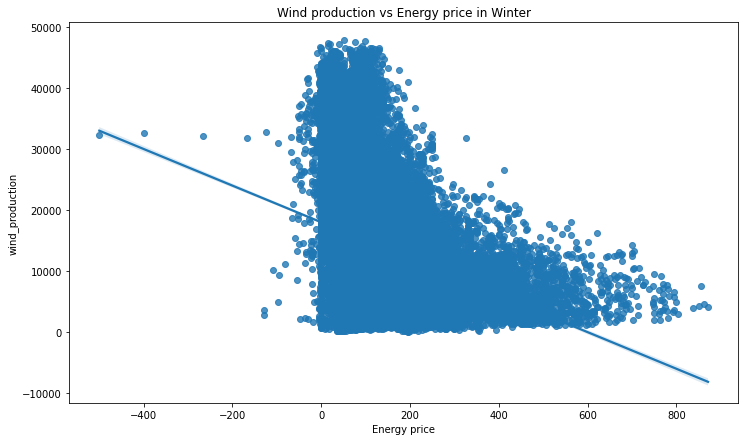

In [ ]:
_ = plt.figure(figsize=(12,7))
seasons = ['summer', "winter"] 
hours = np.arange(0,23) 
_ = sns.regplot(x= data['price'], y= data['wind_production'] , data= \
            df[(df['season'] == seasons[1]) & (df['hour'].isin(hours))]) 
_ = plt.xlabel('Energy price')
_ = plt.title('Wind production vs Energy price in Winter')

In [ ]:
data.index = data.Date

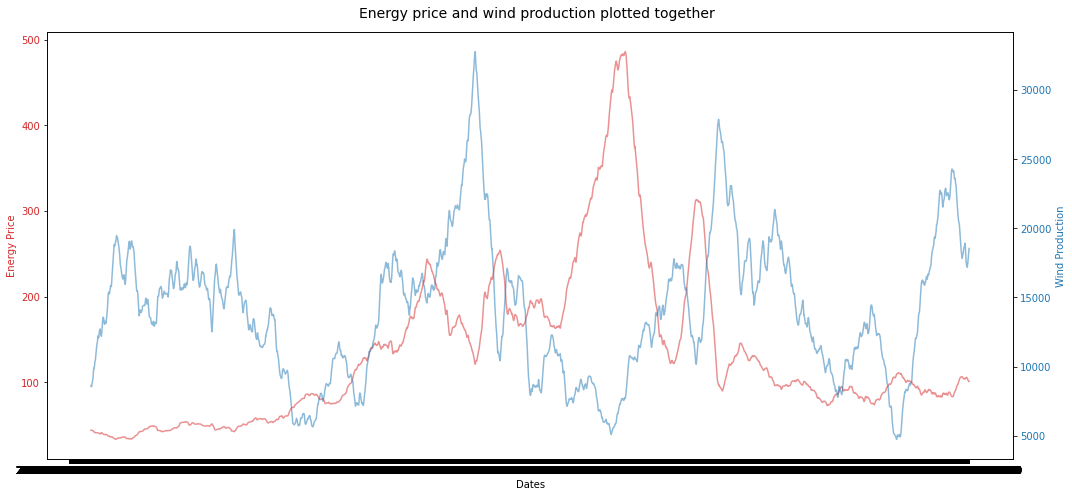

In [ ]:
fig, ax1 = plt.subplots(figsize=(15,7))
rolling_num = 24*30
color = 'tab:red'
ax1.set_xlabel('Dates')
ax1.set_ylabel('Energy Price', color = color)
ax1.plot(data["price"].rolling(rolling_num).mean(), color = color, alpha = 0.5)        
ax1.tick_params(axis='y', labelcolor = color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Wind Production', color = color)  # we already handled the x-label with ax1
ax2.plot(data["wind_production"].rolling(rolling_num).mean(), color = color, alpha = 0.5)   
ax2.tick_params(axis='y', labelcolor = color)

fig.suptitle('Energy price and wind production plotted together', fontsize = 14)
fig.tight_layout()
plt.show()

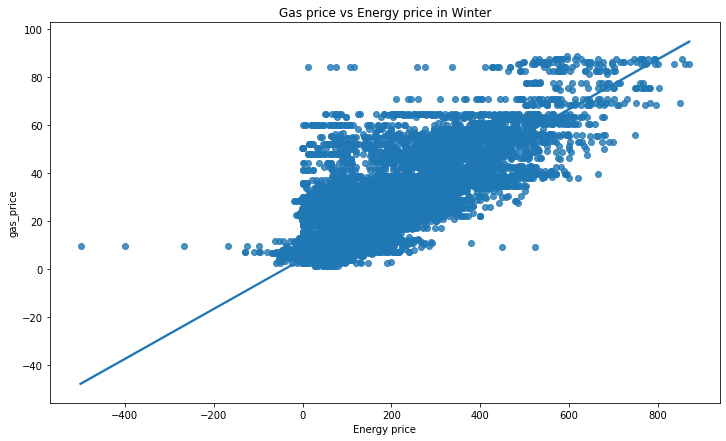

In [ ]:
_ = plt.figure(figsize=(12,7))
seasons = ['summer', "winter"] 
hours = np.arange(0,23) 
_ = sns.regplot(x= data['price'], y= data['gas_price'] , data= \
            df[(df['season'].isin(seasons)) & (df['hour'].isin(hours))]) 
_ = plt.xlabel('Energy price')
_ = plt.title('Gas price vs Energy price in Winter')

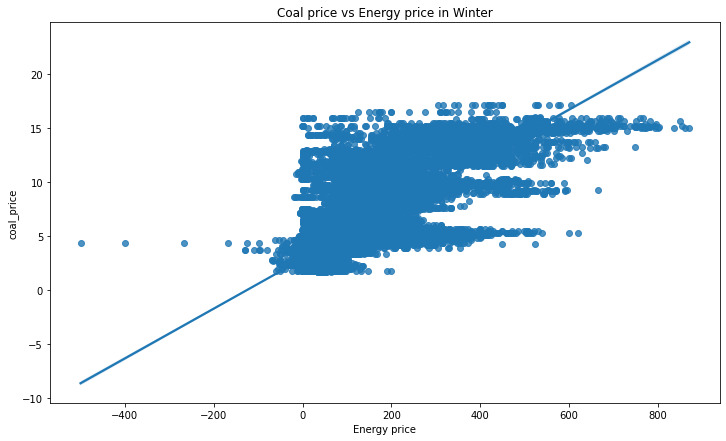

In [ ]:
_ = plt.figure(figsize=(12,7))
seasons = ['summer', "winter"] 
hours = np.arange(0,23) 
_ = sns.regplot(x= data['price'], y= data['coal_price'] , data= \
            df[(df['season'].isin(seasons)) & (df['hour'].isin(hours))]) 
_ = plt.xlabel('Energy price')
_ = plt.title('Coal price vs Energy price in Winter')

**Train test split for time series**

In [ ]:
from sklearn.model_selection import TimeSeriesSplit

tss = TimeSeriesSplit(n_splits = 3)

In [ ]:
data.drop(columns=["Date"], inplace=True)

In [ ]:
data = data.fillna(0)

In [ ]:
data.head()

,price,load_forecast,solar_production,wind_production,temperature_forecast,capacity_thermal_coal,border_flow,capacity_thermal_gas,capacity_nuclear,capacity_hydro,capacity_thermal_oil,oil_price,coal_price,nuclear_production,thermal_coal_production,thermal_oil_production,thermal_biomass_production,thermal_gas_production,gas_price
0,29.76,0.0,0.0,12378.4492,14.4,15676.04,0.0,0.0,7994.0,0.0,1646.1,0.0,0.0,8107.0,0.0,400.0,4403.646,10531.198,1.487063
1,27.92,0.0,0.0,11102.5674,14.0,15676.04,0.0,0.0,7994.0,0.0,1646.1,0.0,0.0,8107.0,0.0,400.0,4403.646,10557.198,1.487063
2,28.89,0.0,0.0,9484.9560,13.7,15676.04,0.0,0.0,7994.0,0.0,1646.1,0.0,0.0,8107.0,0.0,400.0,4403.646,10632.198,1.487063
3,28.43,0.0,0.0,8239.8850,13.4,15676.04,0.0,0.0,7994.0,0.0,1646.1,0.0,0.0,8107.0,0.0,400.0,4403.646,10647.198,1.487063
4,29.41,0.0,0.0,7431.8440,13.3,15676.04,0.0,0.0,7994.0,0.0,1646.1,0.0,0.0,8107.0,0.0,400.0,4403.646,11321.698,1.487063


In [ ]:
X = data.drop(labels=['price'], axis=1)
y = data['price']

In [ ]:
for train_index, test_index in tss.split(X):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index,:]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [ ]:
from sklearn.feature_selection import mutual_info_regression
mutual_info = mutual_info_regression(X_train, y_train)
mutual_info

array([0.0733572 , 0.02525832, 0.1828502 , 0.1137722 , 0.62653958,
       0.15681222, 0.25137632, 0.65867307, 0.53382354, 0.69018963,
       0.89999969, 0.9182403 , 0.58465237, 0.5222698 , 0.60179312,
       0.72763154, 0.32365195, 0.99977474])

In [ ]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

gas_price                     0.999775
coal_price                    0.918240
oil_price                     0.900000
thermal_biomass_production    0.727632
capacity_thermal_oil          0.690190
capacity_nuclear              0.658673
capacity_thermal_coal         0.626540
thermal_oil_production        0.601793
nuclear_production            0.584652
capacity_hydro                0.533824
thermal_coal_production       0.522270
thermal_gas_production        0.323652
capacity_thermal_gas          0.251376
wind_production               0.182850
border_flow                   0.156812
temperature_forecast          0.113772
load_forecast                 0.073357
solar_production              0.025258
dtype: float64

<Axes: >

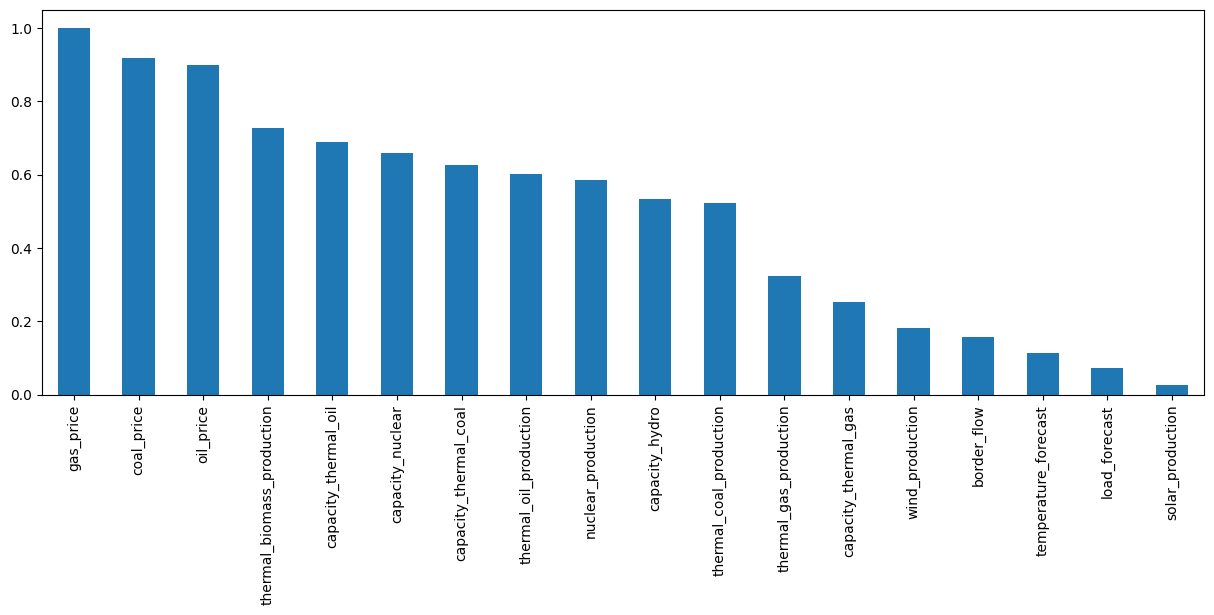

In [ ]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))

In [ ]:
from sklearn.feature_selection import SelectPercentile
selected_top_columns = SelectPercentile(mutual_info_regression, percentile=20)
selected_top_columns.fit(X_train, y_train)
selected_top_columns.get_support()

array([False, False, False, False, False, False, False, False, False,
       False,  True,  True, False, False, False,  True, False,  True])

In [ ]:
X_train.columns[selected_top_columns.get_support()]

Index(['oil_price', 'coal_price', 'thermal_biomass_production', 'gas_price'], dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train = sm.add_constant(X_train_scaled)

model = sm.OLS(y_train, X_train_scaled)
result = model.fit()

print(result.summary())

X_test = sm.add_constant(X_test_scaled)
y_pred = result.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.375
Model:                            OLS   Adj. R-squared (uncentered):              0.374
Method:                 Least Squares   F-statistic:                              721.6
Date:                Wed, 31 Jan 2024   Prob (F-statistic):                        0.00
Time:                        16:21:36   Log-Likelihood:                     -1.4001e+05
No. Observations:               21690   AIC:                                  2.801e+05
Df Residuals:                   21672   BIC:                                  2.802e+05
Df Model:                          18                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

c:\Users\Chaitanya Ashtekar\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\regression\linear_model.py:1934: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


In [ ]:
X_specific = data[["gas_price", "coal_price", "oil_price", "capacity_thermal_oil",
"thermal_coal_production"]]

In [ ]:
for train_index, test_index in tss.split(X):
    X_train, X_test = X_specific.iloc[train_index, :], X_specific.iloc[test_index,:]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [ ]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X_train)

# scaled_features_with_constant = sm.add_constant(scaled_features)

# # Fit the OLS regression model
# model = sm.OLS(y_train, X_train)
# result = model.fit()

# print(result.summary())

In [ ]:
X_test_scaled = scaler.transform(X_test)

X_test = sm.add_constant(X_test_scaled)
y_pred = result.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 12365.912526451266


In [ ]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 103.10673353725913


## XGBoost with best set of features ##

In [ ]:
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import root_mean_squared_error
from xgboost import XGBRegressor

xgbm_pipeline = Pipeline([("RS",RobustScaler(with_scaling=True)),
                          ('XGBM', XGBRegressor(random_state=42))])

# XGBM Hyperparameters
xgbm_parameters = [{"XGBM__max_depth":np.arange(3,30,3),
                    "XGBM__n_estimators":np.arange(100,351,50),
                    "XGBM__learning_rate":np.arange(0.1,0.45,0.05),
                    "XGBM__subsample":np.arange(0.7,0.95,0.05)}]

# RandomizedSearchCV w/ pipeline   
xgbm_rsg = RandomizedSearchCV(estimator=xgbm_pipeline,
                              param_distributions=xgbm_parameters,
                              scoring="neg_mean_absolute_error",
                              verbose=1)
# fit and predict
xgbm_rsg.fit(X_train, y_train)
xgbm_rsg_preds = xgbm_rsg.predict(X_test)

# RMSE Score
xgbm_rsg_rmse = root_mean_squared_error(y_test, xgbm_rsg_preds)

# Model Performance and Best Parameter Selection
print("XGBRegressor RMSE: {:.3f}".format(xgbm_rsg_rmse),
      "\nBest Parameters: {}".format(xgbm_rsg.best_params_))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
XGBRegressor RMSE: 44.306 
Best Parameters: {'XGBM__subsample': 0.75, 'XGBM__n_estimators': 150, 'XGBM__max_depth': 6, 'XGBM__learning_rate': 0.20000000000000004}


In [ ]:
xgbm = XGBRegressor(subsample=0.75, n_estimators=150, max_depth=6, learning_rate=0.2, random_state=42)
xgbm.fit(X_train, y_train)
xgbm_pred = xgbm.predict(X_test)

mae = mean_absolute_error(y_test, xgbm_pred)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 34.7980899094183


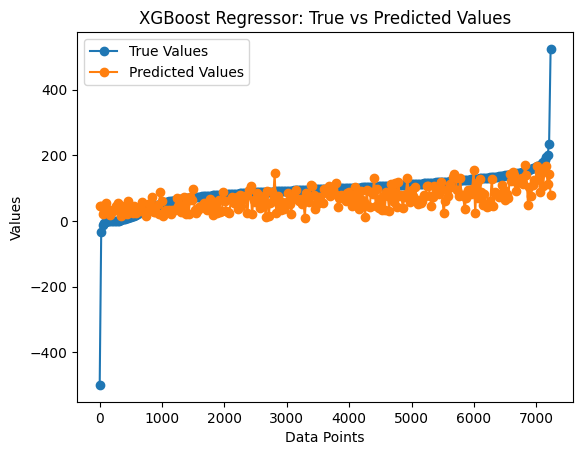

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline

xgbm_pred = np.array(xgbm_pred)
ytest = np.array(y_test)

sorted_indices = np.argsort(ytest)
sorted_true_values = ytest[sorted_indices]
sorted_pred_values = xgbm_pred[sorted_indices]

# Creating a smoother line using interpolation
x_smooth = np.linspace(0, len(sorted_true_values) - 1, 300)
spl_true = make_interp_spline(np.arange(len(sorted_true_values)), sorted_true_values, k=3)
spl_pred = make_interp_spline(np.arange(len(sorted_pred_values)), sorted_pred_values, k=3)

y_smooth_true = spl_true(x_smooth)
y_smooth_pred = spl_pred(x_smooth)

# Plotting the smooth line plot
plt.plot(x_smooth, y_smooth_true, label='True Values', marker='o')
plt.plot(x_smooth, y_smooth_pred, label='Predicted Values', marker='o')
plt.title('XGBoost Regressor: True vs Predicted Values')
plt.xlabel('Data Points')
plt.ylabel('Values')
plt.legend()
plt.show()


## Including time based features in the dataset

In [ ]:
df = data.copy()

weekdays = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3: 'Thursday', 4: 'Friday', 5:'Saturday', 6:'Sunday'}
df['year'] = df.index.year
df['month'] = df.index.month
df['hour'] = df.index.hour
df['weekday'] = df.index.weekday.map(weekdays)
df['season'] = df.month.apply(season_calc)

In [ ]:
subset_time_df = df[["gas_price", "coal_price", "oil_price", "capacity_thermal_oil",
"thermal_biomass_production", "year", "month", "hour", "weekday", "season", "price"]]

In [ ]:
cat_cols = ['year', 'month', 'hour', 'weekday', 'season']

for col in cat_cols:
    subset_time_df[col] = subset_time_df[col].astype('category')

C:\Users\Chaitanya Ashtekar\AppData\Local\Temp\ipykernel_5568\1145349766.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_time_df[col] = subset_time_df[col].astype('category')


In [ ]:
subset_time_df = pd.get_dummies(subset_time_df, drop_first=True)

In [ ]:
subset_time_df = subset_time_df.reset_index(drop=True)

In [ ]:
subset_time_df = subset_time_df.fillna(0.0)

In [ ]:
test_index = int(len(subset_time_df)*(1-0.15))
X_train = subset_time_df.drop('price', axis = 1).iloc[:test_index]
y_train = subset_time_df.price.iloc[:test_index]
X_test = subset_time_df.drop('price', axis = 1).iloc[test_index:]
y_test = subset_time_df.price.iloc[test_index:]

In [ ]:
df.iloc[24581]

price                              127.17
load_forecast                     54304.2
solar_production              2130.166504
wind_production               7976.226074
temperature_forecast                 19.5
capacity_thermal_coal            10473.15
border_flow                       8555.76
capacity_thermal_gas            22958.297
capacity_nuclear                   1113.6
capacity_hydro                     6000.9
capacity_thermal_oil                712.5
oil_price                       11.885422
coal_price                       4.180079
nuclear_production                    0.0
thermal_coal_production            5318.9
thermal_oil_production              150.0
thermal_biomass_production      4600.4055
thermal_gas_production           12805.85
gas_price                        9.775896
year                                 2023
month                                   6
hour                                    6
weekday                         Wednesday
season                            

## Trying Regularization

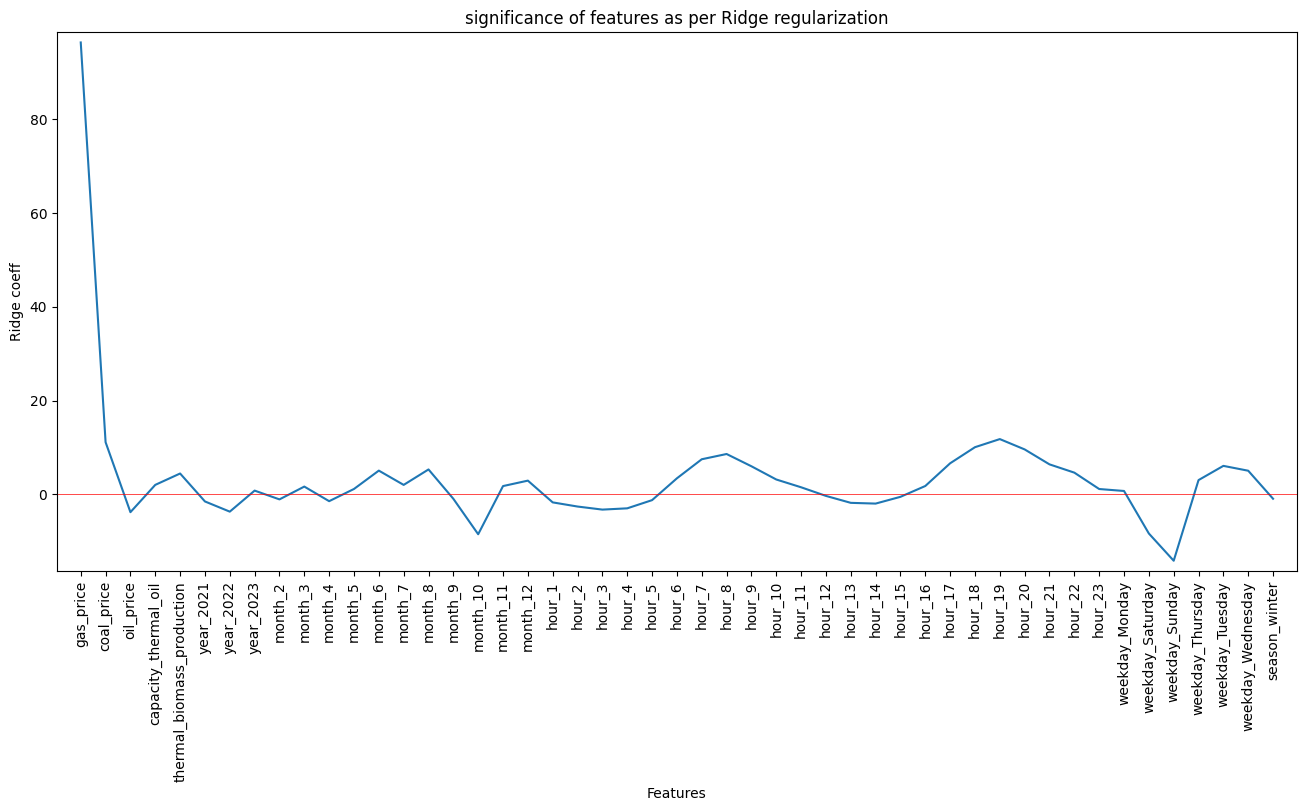

In [ ]:
from sklearn.linear_model import Ridge

# Instantiate a ridge regressor: ridge
ridge = Ridge(alpha = 0.2) #selecting alpha=0.2 here. 
# Tried different values from 0.1 to 0.8, results don't change much

X_train_scaled = StandardScaler().fit_transform(X_train)

# Fit the regressor to the data
ridge.fit(X_train_scaled, y_train)

# Compute and print the coefficients
ridge_coef = ridge.coef_
#print(ridge_coef)

# Plot the coefficients
_ = plt.figure(figsize = (16, 7))
_ = plt.plot(range(len(X_train.columns)), ridge_coef)
_ = plt.xticks(range(len(X_train.columns)), X_train.columns.values, rotation = 90)
_ = plt.margins(0.02)
_ = plt.axhline(0, linewidth = 0.5, color = 'r')
_ = plt.title('significance of features as per Ridge regularization')
_ = plt.ylabel('Ridge coeff')
_ = plt.xlabel('Features')

In [ ]:
print('Ridge regression on training set')

train_pred = ridge.predict(X_train_scaled)
print(f"MSE: {mean_squared_error(train_pred, y_train)}")
print(f"MAE: {mean_absolute_error(train_pred, y_train)}")

print('\nRidge regression on test set')
X_test_scaled = StandardScaler().fit_transform(X_test)
test_pred = ridge.predict(X_test_scaled)
print(f"MSE: {mean_squared_error(test_pred, y_test)}")
print(f"MAE: {mean_absolute_error(test_pred, y_test)}")

Ridge regression on training set
MSE: 3885.291416509689
MAE: 42.41747010749339

Ridge regression on test set
MSE: 12886.572521686352
MAE: 90.77950655541285


Lets try XGBoost again on this modified dataset which contains some time based features.

In [ ]:
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import root_mean_squared_error

xgbm_pipeline = Pipeline([("RS",RobustScaler(with_scaling=True)),
                          ('XGBM', XGBRegressor(random_state=42))])

# XGBM Hyperparameters
xgbm_parameters = [{"XGBM__max_depth":np.arange(3,30,3),
                    "XGBM__n_estimators":np.arange(100,351,50),
                    "XGBM__learning_rate":np.arange(0.1,0.45,0.05),
                    "XGBM__subsample":np.arange(0.7,0.95,0.05)}]

# RandomizedSearchCV w/ pipeline   
xgbm_rsg = RandomizedSearchCV(estimator=xgbm_pipeline,
                              param_distributions=xgbm_parameters,
                              scoring="neg_mean_absolute_error",
                              verbose=1)
# fit and predict
xgbm_rsg.fit(X_train, y_train)

print('\nXGBoost regression on test set')
xgbm_rsg_preds = xgbm_rsg.predict(X_test)
print(f"MSE: {mean_squared_error(xgbm_rsg_preds, y_test)}")
print(f"MAE: {mean_absolute_error(xgbm_rsg_preds, y_test)}")

# Best Parameter Selection
print("\nBest Parameters: {}".format(xgbm_rsg.best_params_))

Fitting 5 folds for each of 10 candidates, totalling 50 fits

XGBoost regression on test set
MSE: 1623.0306307862131
MAE: 27.975923778552403

Best Parameters: {'XGBM__subsample': 0.7, 'XGBM__n_estimators': 100, 'XGBM__max_depth': 6, 'XGBM__learning_rate': 0.20000000000000004}


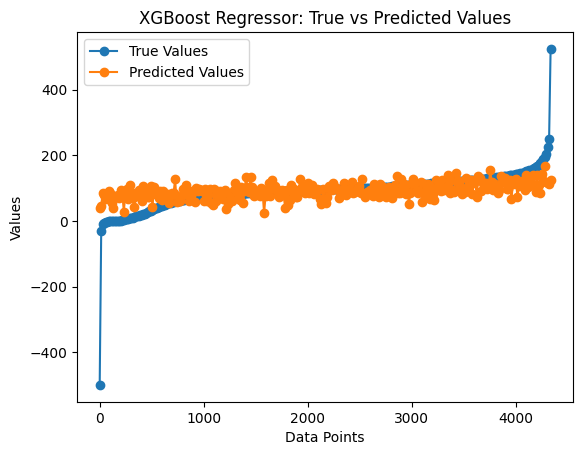

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline

xgbm_pred = np.array(xgbm_rsg_preds)
ytest = np.array(y_test)

sorted_indices = np.argsort(ytest)
sorted_true_values = ytest[sorted_indices]
sorted_pred_values = xgbm_rsg_preds[sorted_indices]

# Creating a smoother line using interpolation
x_smooth = np.linspace(0, len(sorted_true_values) - 1, 300)
spl_true = make_interp_spline(np.arange(len(sorted_true_values)), sorted_true_values, k=3)
spl_pred = make_interp_spline(np.arange(len(sorted_pred_values)), sorted_pred_values, k=3)

y_smooth_true = spl_true(x_smooth)
y_smooth_pred = spl_pred(x_smooth)

# Plotting the smooth line plot
plt.plot(x_smooth, y_smooth_true, label='True Values', marker='o')
plt.plot(x_smooth, y_smooth_pred, label='Predicted Values', marker='o')
plt.title('XGBoost Regressor: True vs Predicted Values')
plt.xlabel('Data Points')
plt.ylabel('Values')
plt.legend()
plt.show()

In [ ]:
hour_dict = {'morning': list(np.arange(7,13)),'afternoon': list(np.arange(13,16)), 'evening': list(np.arange(16,22)),
            'night': [22, 23, 0, 1, 2, 3, 4, 5, 6]}

In [ ]:
def time_of_day(x):
    if x in hour_dict['morning']:
        return 'morning'
    elif x in hour_dict['afternoon']:
        return 'afternoon'
    elif x in hour_dict['evening']:
        return 'evening'
    else:
        return 'night'

In [ ]:
subset_time_df_2 = df[["gas_price", "coal_price", "oil_price", "capacity_thermal_oil",
"thermal_biomass_production", "year", "hour", "weekday", "season", "price"]]

In [ ]:
subset_time_df_2["time_of_day"] = subset_time_df_2['hour'].apply(time_of_day)

C:\Users\Chaitanya Ashtekar\AppData\Local\Temp\ipykernel_5568\2923402095.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_time_df_2["time_of_day"] = subset_time_df_2['hour'].apply(time_of_day)


In [ ]:
subset_time_df_2 = subset_time_df_2.drop(columns=["hour"])
subset_time_df_2 = subset_time_df_2.reset_index(drop=True)

In [ ]:
cat_cols = ['year', 'weekday', 'season', "time_of_day"]

for col in cat_cols:
    subset_time_df_2[col] = subset_time_df_2[col].astype('category')

In [ ]:
subset_time_df_2 = pd.get_dummies(subset_time_df_2, drop_first=True)

In [ ]:
test_index = int(len(subset_time_df_2)*(1-0.15))
X_train = subset_time_df_2.drop('price', axis = 1).iloc[:test_index]
y_train = subset_time_df_2.price.iloc[:test_index]
X_test = subset_time_df_2.drop('price', axis = 1).iloc[test_index:]
y_test = subset_time_df_2.price.iloc[test_index:]

In [ ]:
xgbm_pipeline = Pipeline([("RS",RobustScaler(with_scaling=True)),
                          ("XGBM", XGBRegressor(subsample= 0.7, n_estimators= 100, max_depth= 4, learning_rate= 0.2, random_state=42))])



xgbm_pipeline.fit(X_train, y_train)

print('\nXGBoost regression on test set')
xgbm_rsg_preds = xgbm_pipeline.predict(X_test)
print(f"MSE: {mean_squared_error(xgbm_rsg_preds, y_test)}")
print(f"MAE: {mean_absolute_error(xgbm_rsg_preds, y_test)}")


XGBoost regression on test set
MSE: 1837.475757020934
MAE: 29.90105142852797


## Experimenting with Time Series features

In [ ]:
X = data.copy()

In [ ]:
X.index = pd.to_datetime(X.index)

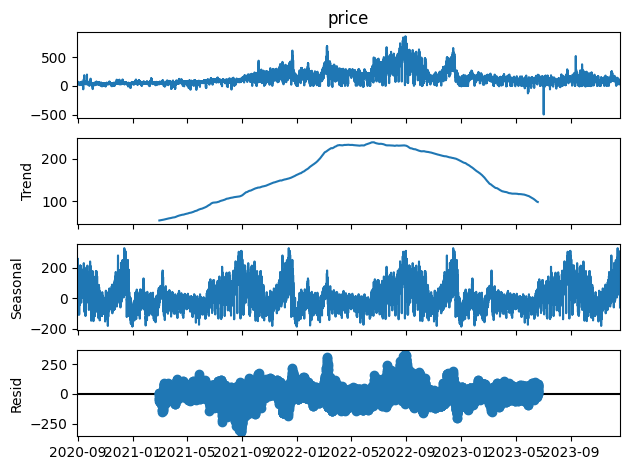

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomp = seasonal_decompose(data["price"].dropna(), period=24*365) 
_ = decomp.plot()

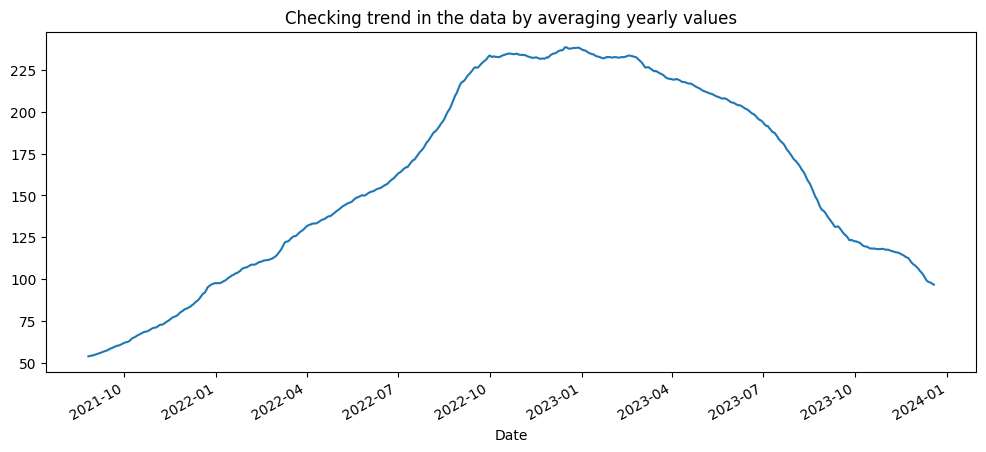

In [ ]:
_ = data['price'].rolling(window = 24*30*12).mean().plot(figsize=(12,5))
_ = plt.title('Checking trend in the data by averaging yearly values')

In [ ]:
data.index = pd.to_datetime(data.index)

In [ ]:
def lagplot(x, y=None, lag=1, standardize=False, ax=None, **kwargs):
    from matplotlib.offsetbox import AnchoredText
    x_ = x.shift(lag)
    if standardize:
        x_ = (x_ - x_.mean()) / x_.std()
    if y is not None:
        y_ = (y - y.mean()) / y.std() if standardize else y
    else:
        y_ = x
    corr = y_.corr(x_)
    if ax is None:
        fig, ax = plt.subplots()
    scatter_kws = dict(
        alpha=0.75,
        s=3,
    )
    line_kws = dict(color='C3', )
    ax = sns.regplot(x=x_,
                     y=y_,
                     scatter_kws=scatter_kws,
                     line_kws=line_kws,
                     lowess=True,
                     ax=ax,
                     **kwargs)
    at = AnchoredText(
        f"{corr:.2f}",
        prop=dict(size="large"),
        frameon=True,
        loc="upper left",
    )
    at.patch.set_boxstyle("square, pad=0.0")
    ax.add_artist(at)
    ax.set(title=f"Lag {lag}", xlabel=x_.name, ylabel=y_.name)
    return ax


def plot_lags(x, y=None, lags=6, nrows=1, lagplot_kwargs={}, **kwargs):
    import math
    kwargs.setdefault('nrows', nrows)
    kwargs.setdefault('ncols', math.ceil(lags / nrows))
    kwargs.setdefault('figsize', (kwargs['ncols'] * 2, nrows * 2 + 0.5))
    fig, axs = plt.subplots(sharex=True, sharey=True, squeeze=False, **kwargs)
    for ax, k in zip(fig.get_axes(), range(kwargs['nrows'] * kwargs['ncols'])):
        if k + 1 <= lags:
            ax = lagplot(x, y, lag=k + 1, ax=ax, **lagplot_kwargs)
            ax.set_title(f"Lag {k + 1}", fontdict=dict(fontsize=14))
            ax.set(xlabel="", ylabel="")
        else:
            ax.axis('off')
    plt.setp(axs[-1, :], xlabel=x.name)
    plt.setp(axs[:, 0], ylabel=y.name if y is not None else x.name)
    fig.tight_layout(w_pad=0.1, h_pad=0.1)
    return fig

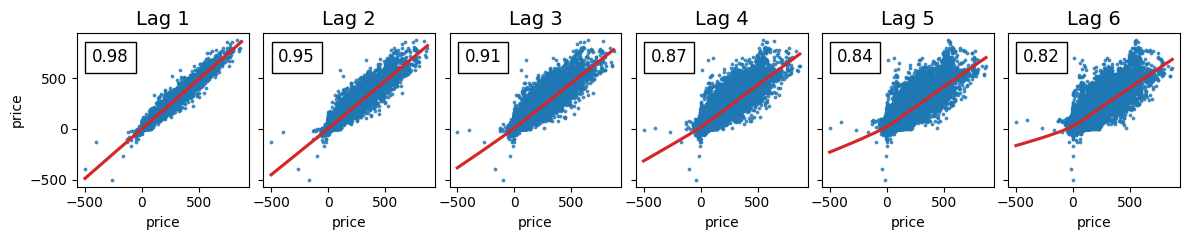

In [ ]:
_ = plot_lags(data.price, lags=6, nrows=1)

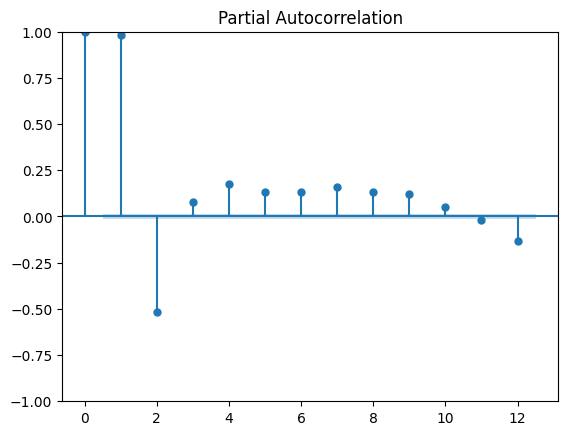

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf

_ = plot_pacf(X.price, lags=12)

Next iteration: Using lagged features and using a combination of two models(linear regression on the trend and XGBoost on residuals) and look for performance improvement.

### LAGGED FEATURES WITH XGBOOST

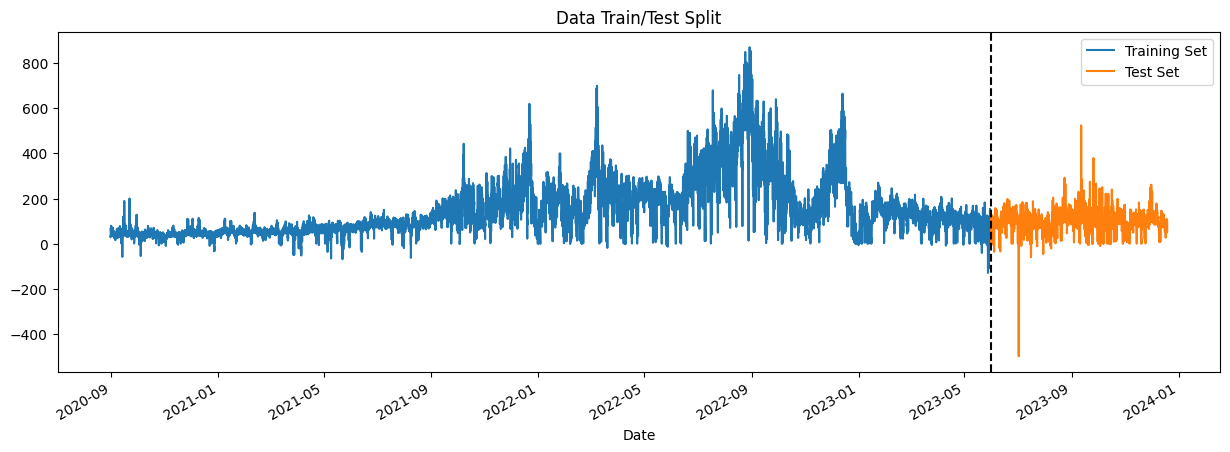

In [31]:
df = data[["price"]]

df.index = pd.to_datetime(df.index)

df.sort_index(inplace=True)

train = df.loc[df.index < "2023-06-01 00:00:00"]
test = df.loc[df.index >= '2023-06-01 00:00:00']

fig, ax = plt.subplots(figsize=(15, 5))
train.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test.plot(ax=ax, label='Test Set')
ax.axvline('2023-06-01 00:00:00', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

In [32]:
def add_lags(df):
    target_map = df['price'].to_dict()
    df['lag1'] = (df.index - pd.Timedelta('1 days')).map(target_map)
    df['lag2'] = (df.index - pd.Timedelta('2 days')).map(target_map)
    df['lag3'] = (df.index - pd.Timedelta('3 days')).map(target_map)
    df['lag4'] = (df.index - pd.Timedelta('4 days')).map(target_map)
    df['lag5'] = (df.index - pd.Timedelta('5 days')).map(target_map)
    df['lag6'] = (df.index - pd.Timedelta('6 days')).map(target_map)
    return df

In [34]:
df = add_lags(df)

C:\Users\Chaitanya Ashtekar\AppData\Local\Temp\ipykernel_3928\1886558408.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lag1'] = (df.index - pd.Timedelta('1 days')).map(target_map)
C:\Users\Chaitanya Ashtekar\AppData\Local\Temp\ipykernel_3928\1886558408.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lag2'] = (df.index - pd.Timedelta('2 days')).map(target_map)
C:\Users\Chaitanya Ashtekar\AppData\Local\Temp\ipykernel_3928\1886558408.py:5: SettingWithCopyWarning: 
A value is trying to be set 

In [35]:
cat_cols = ['year', 'hour', 'weekday', 'season']

for col in cat_cols:
     df[col] = df[col].astype('category')

KeyError: 'year'

In [186]:
df = df.sort_index()

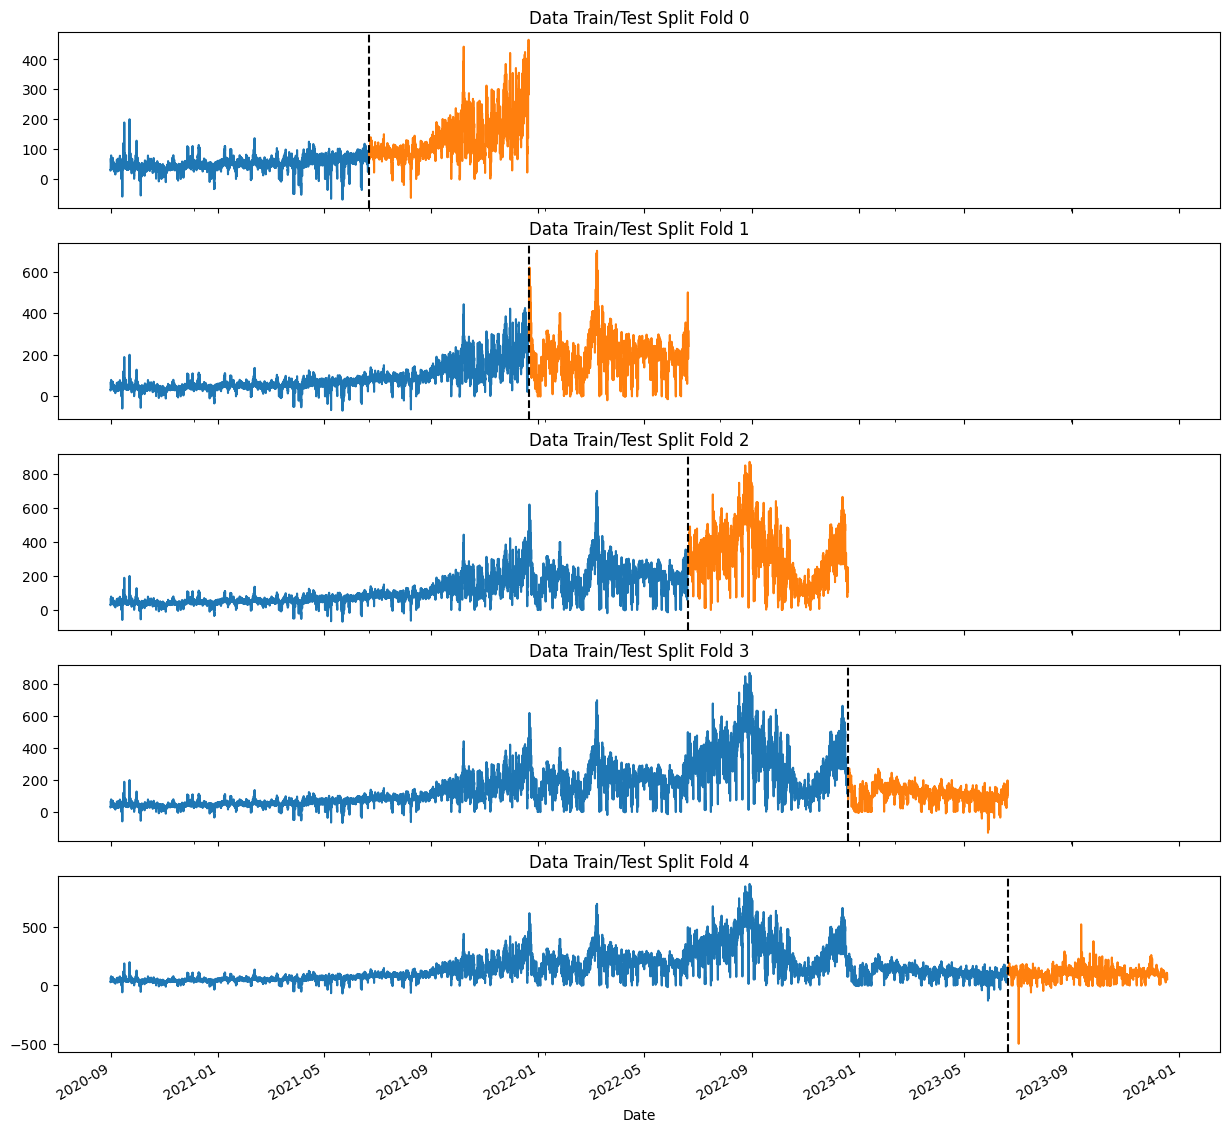

In [196]:
fig, axs = plt.subplots(5, 1, figsize=(15, 15), sharex=True)

fold = 0
for train_idx, val_idx in tss.split(df):
    train = df.iloc[train_idx]
    test = df.iloc[val_idx]
    train['price'].plot(ax=axs[fold],
                          label='Training Set',
                          title=f'Data Train/Test Split Fold {fold}')
    test['price'].plot(ax=axs[fold],
                         label='Test Set')
    axs[fold].axvline(test.index.min(), color='black', ls='--')
    fold += 1
plt.show()

In [193]:
from sklearn.model_selection import TimeSeriesSplit

tss = TimeSeriesSplit(n_splits=5, test_size=24*7*26, gap=24)

fold = 0
preds = []
scores = []
for train_idx, val_idx in tss.split(df):
    train = df.iloc[train_idx]
    test = df.iloc[val_idx]

    FEATURES = ["coal_price", "oil_price", "capacity_thermal_oil",
   "thermal_biomass_production", "solar_production", "wind_production", "lag1", "lag2", "lag3"] #need to include gas price
    TARGET = 'price'

    X_train = train[FEATURES]
    y_train = train[TARGET]

    X_test = test[FEATURES]
    y_test = test[TARGET]


    reg = XGBRegressor(base_score=0.5, booster='gbtree',    
                           n_estimators=1000,
                           early_stopping_rounds=50,
                           objective='reg:linear',
                           max_depth=4,
                           learning_rate=0.01)
    reg.fit(X_train, y_train,
            eval_set=[(X_train, y_train), (X_test, y_test)],
            verbose=100)

    y_pred = reg.predict(X_test)
    preds.append(y_pred)
    score = np.sqrt(mean_squared_error(y_test, y_pred))
    scores.append(score)


[0]	validation_0-rmse:51.37207	validation_1-rmse:150.44287


[100]	validation_0-rmse:22.33496	validation_1-rmse:114.08971


c:\Users\Chaitanya Ashtekar\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:53:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[200]	validation_0-rmse:13.61033	validation_1-rmse:101.55471
[300]	validation_0-rmse:11.22174	validation_1-rmse:94.83666
[400]	validation_0-rmse:10.36904	validation_1-rmse:91.37873
[500]	validation_0-rmse:9.88049	validation_1-rmse:89.46835
[600]	validation_0-rmse:9.48180	validation_1-rmse:87.66618
[700]	validation_0-rmse:9.23559	validation_1-rmse:86.33913
[800]	validation_0-rmse:8.97655	validation_1-rmse:85.43483
[900]	validation_0-rmse:8.74708	validation_1-rmse:85.16128
[999]	validation_0-rmse:8.58950	validation_1-rmse:84.74503
[0]	validation_0-rmse:99.72335	validation_1-rmse:200.71936
[100]	validation_0-rmse:43.27934	validation_1-rmse:98.01362


c:\Users\Chaitanya Ashtekar\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:53:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[200]	validation_0-rmse:25.81008	validation_1-rmse:66.32477
[300]	validation_0-rmse:20.93729	validation_1-rmse:60.98474
[385]	validation_0-rmse:19.56669	validation_1-rmse:61.18977
[0]	validation_0-rmse:135.60777	validation_1-rmse:333.60257
[100]	validation_0-rmse:59.37561	validation_1-rmse:160.56047


c:\Users\Chaitanya Ashtekar\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:53:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[200]	validation_0-rmse:36.15170	validation_1-rmse:111.43051
[300]	validation_0-rmse:29.61093	validation_1-rmse:97.68483
[400]	validation_0-rmse:27.28277	validation_1-rmse:92.78190
[500]	validation_0-rmse:26.07448	validation_1-rmse:89.87625
[600]	validation_0-rmse:25.30615	validation_1-rmse:88.44084
[700]	validation_0-rmse:24.77914	validation_1-rmse:87.54135
[800]	validation_0-rmse:24.32060	validation_1-rmse:86.94553
[861]	validation_0-rmse:24.06019	validation_1-rmse:87.06473
[0]	validation_0-rmse:196.21350	validation_1-rmse:112.80697


c:\Users\Chaitanya Ashtekar\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:53:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[100]	validation_0-rmse:84.57778	validation_1-rmse:43.99875
[200]	validation_0-rmse:51.20452	validation_1-rmse:39.42100
[209]	validation_0-rmse:49.86275	validation_1-rmse:39.71239
[0]	validation_0-rmse:184.25707	validation_1-rmse:101.31309


c:\Users\Chaitanya Ashtekar\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:53:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[100]	validation_0-rmse:80.37546	validation_1-rmse:41.07447
[200]	validation_0-rmse:49.25114	validation_1-rmse:34.06414
[214]	validation_0-rmse:47.33220	validation_1-rmse:34.20753


In [194]:
print(f'Score across folds {np.mean(scores):0.4f}')
print(f'Fold scores:{scores}')

Score across folds 60.9653
Fold scores:[84.74503326312156, 60.651295149207456, 86.85469296861389, 38.6392844184102, 33.936353628015546]


In [198]:
train = df.loc[df.index < "2023-06-01 00:00:00"]
test = df.loc[df.index >= '2023-06-01 00:00:00']

X_test = test[["coal_price", "oil_price", "capacity_thermal_oil",
   "thermal_biomass_production", "solar_production", "wind_production", "lag1", "lag2", "lag3"]]

In [200]:
preds = reg.predict(X_test)

C:\Users\Chaitanya Ashtekar\AppData\Local\Temp\ipykernel_7456\4064714140.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['prediction'] = preds


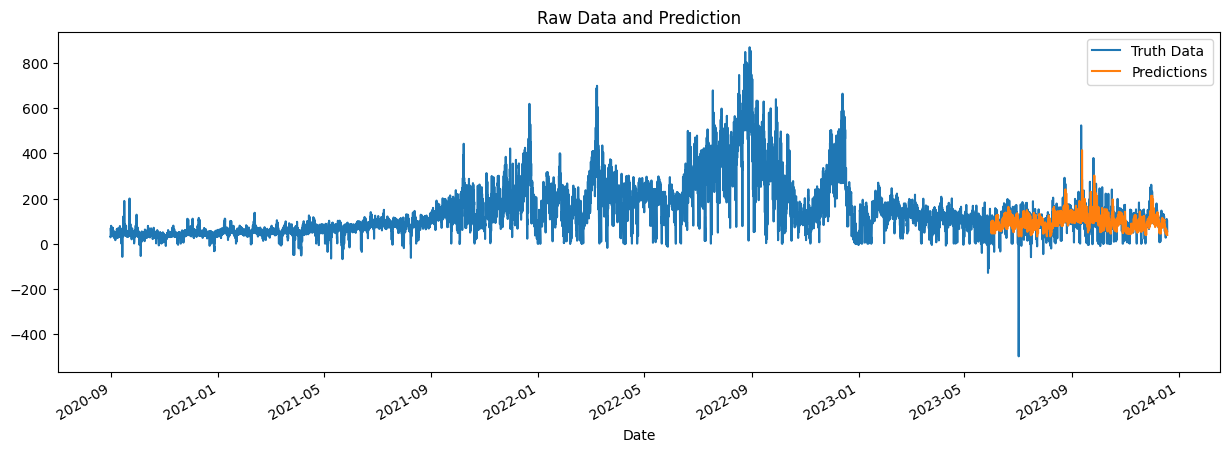

In [201]:
test['prediction'] = preds
df = df.merge(test[['prediction']], how='left', left_index=True, right_index=True)
ax = df[['price']].plot(figsize=(15, 5))
df['prediction'].plot(ax=ax, style='-')
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Data and Prediction')
plt.show()

In [202]:
from sklearn.metrics import mean_squared_error

y_test = test["price"]
mse = mean_squared_error(y_test, preds)
mae = mean_absolute_error(y_test, preds)

print(f"MSE: {mse}")
print(f"MAE: {mae}")


MSE: 1115.923540979355
MAE: 23.39720215771735


In [203]:
X_train = train[["coal_price", "oil_price", "capacity_thermal_oil",
   "thermal_biomass_production", "solar_production", "wind_production", "lag1", "lag2", "lag3"]]

In [204]:
y_fit = reg.predict(X_train)

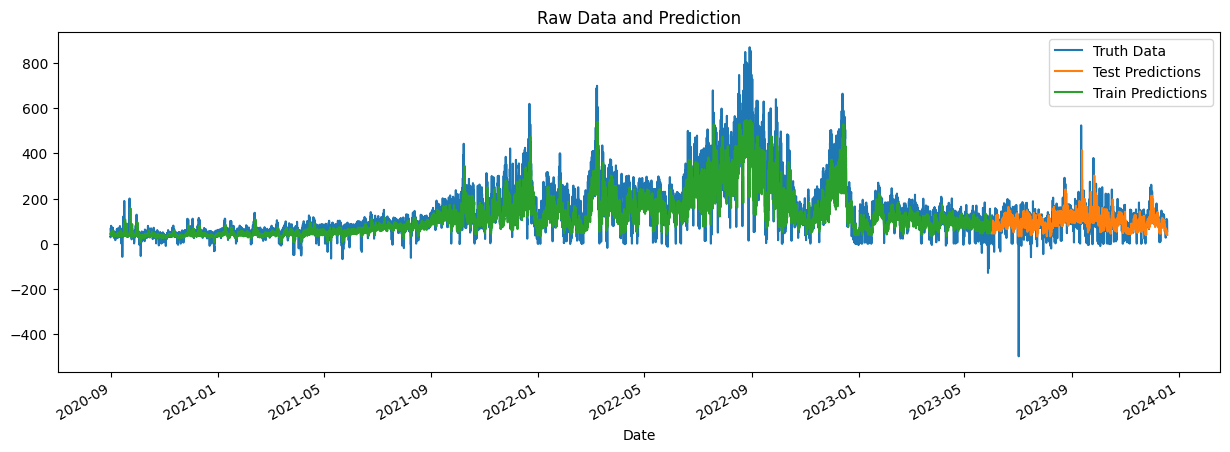

In [206]:
train['prediction_xgb_train'] = y_fit
df_ = df.merge(train[['prediction_xgb_train']], how='left', left_index=True, right_index=True)
ax = df_[['price']].plot(figsize=(15, 5))
df_['prediction'].plot(ax=ax, style='-')
df_["prediction_xgb_train"].plot(ax=ax, style="-")
plt.legend(['Truth Data', 'Test Predictions', "Train Predictions"])
ax.set_title('Raw Data and Prediction')
plt.show()

In [207]:
from sklearn.metrics import mean_squared_error

y_train = train["price"]
mse = mean_squared_error(y_train, y_fit)
mae = mean_absolute_error(y_train, y_fit)

print(f"MSE: {mse}")
print(f"MAE: {mae}")

MSE: 3162.7305007255554
MAE: 37.52053114501469


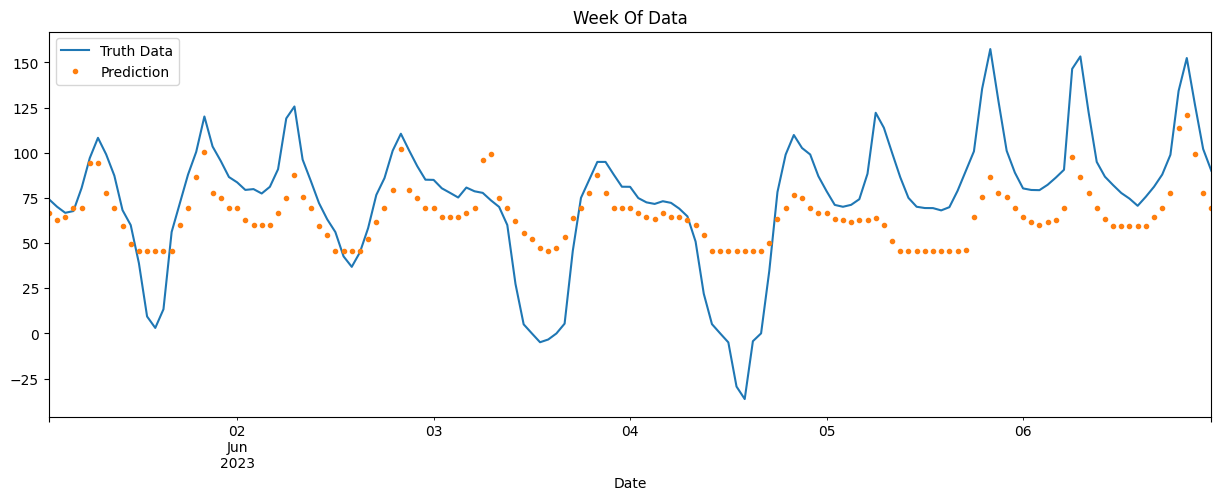

In [208]:
ax = df.loc[(df.index > '06-01-2023') & (df.index < '06-07-2023')]['price'] \
    .plot(figsize=(15, 5), title='Week Of Data')
df.loc[(df.index > '06-01-2023') & (df.index < '06-07-2023')]['prediction'] \
    .plot(style='.')
plt.legend(['Truth Data','Prediction'])
plt.show()

### HYBRID MODEL: Linear Regression + XGBoost

In [10]:
from statsmodels.tsa.deterministic import DeterministicProcess

dp = DeterministicProcess(
    index=data.index,  
    constant=True,
    order=2,      
    drop=True)
X_dp = dp.in_sample()  # features for the training data

In [11]:
X_dp.index = pd.to_datetime(X_dp.index)

In [12]:
X_dp.sort_index(inplace=True)

In [13]:
train = X_dp.loc[X_dp.index < "2023-06-01 00:00:00"]
test = X_dp.loc[X_dp.index >= '2023-06-01 00:00:00']

In [15]:
X_train = train
X_test = test

In [16]:
df = data[["price"]]

df.index = pd.to_datetime(df.index)

df.sort_index(inplace=True)

train_set = df.loc[df.index < "2023-06-01 00:00:00"]
test_set = df.loc[df.index >= '2023-06-01 00:00:00']

In [17]:
y_train = train_set["price"]
y_test = test_set["price"]

In [147]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=False)
model.fit(X_train, y_train)

# Make predictions
y_fit = model.predict(X_train)

In [148]:
y_pred = model.predict(X_test)

In [150]:
y_train = np.array(y_train)

In [151]:
y_resid = y_train - y_fit

In [152]:
df = data.copy()
df.index = pd.to_datetime(df.index)

weekdays = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3: 'Thursday', 4: 'Friday', 5:'Saturday', 6:'Sunday'}
df['year'] = df.index.year
df['hour'] = df.index.hour
df["month"] = df.index.month
df['weekday'] = df.index.weekday.map(weekdays)
df['season'] = df.month.apply(season_calc)

In [153]:
subset_df = df[["coal_price", "oil_price", "capacity_thermal_oil",
"thermal_biomass_production", "solar_production", "wind_production", "year", "hour", "weekday", "season"]]

In [154]:
subset_df.fillna(0.0, inplace = True)

C:\Users\Chaitanya Ashtekar\AppData\Local\Temp\ipykernel_7456\2341724891.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df.fillna(0.0, inplace = True)


In [155]:
subset_df.sort_index(inplace=True)

In [156]:
cat_cols = ['year', 'hour', 'weekday', 'season']

for col in cat_cols:
    subset_df[col] = subset_df[col].astype('category')

C:\Users\Chaitanya Ashtekar\AppData\Local\Temp\ipykernel_7456\2870790567.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df[col] = subset_df[col].astype('category')
C:\Users\Chaitanya Ashtekar\AppData\Local\Temp\ipykernel_7456\2870790567.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df[col] = subset_df[col].astype('category')
C:\Users\Chaitanya Ashtekar\AppData\Local\Temp\ipykernel_7456\2870790567.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

In [157]:
subset_df = pd.get_dummies(subset_df, drop_first=True)

In [158]:
trainset = subset_df.loc[subset_df.index < "2023-06-01 00:00:00"]
testset = subset_df.loc[subset_df.index >= "2023-06-01 00:00:00"]

In [159]:
X_train = trainset
X_test = testset

In [21]:
X_test

,const,trend,trend_squared


In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [161]:
from xgboost import XGBRegressor

model = XGBRegressor(subsample= 0.7, n_estimators= 100, max_depth= 6, learning_rate= 0.2, random_state=42)
model.fit(X_train, y_resid)

y_fit_boosted = model.predict(X_train) + y_fit
y_pred_boosted = model.predict(X_test) + y_pred

In [162]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_pred_boosted, y_test)
mae = mean_absolute_error(y_pred_boosted, y_test)

print(f"MSE for hybrid model: {mse}")
print(f"MAE for hybrid model: {mae}")

MSE for hybrid model: 7945.411460088291
MAE for hybrid model: 78.81548484651425


C:\Users\Chaitanya Ashtekar\AppData\Local\Temp\ipykernel_7456\2993983864.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testset['prediction_xgb'] = y_pred_boosted


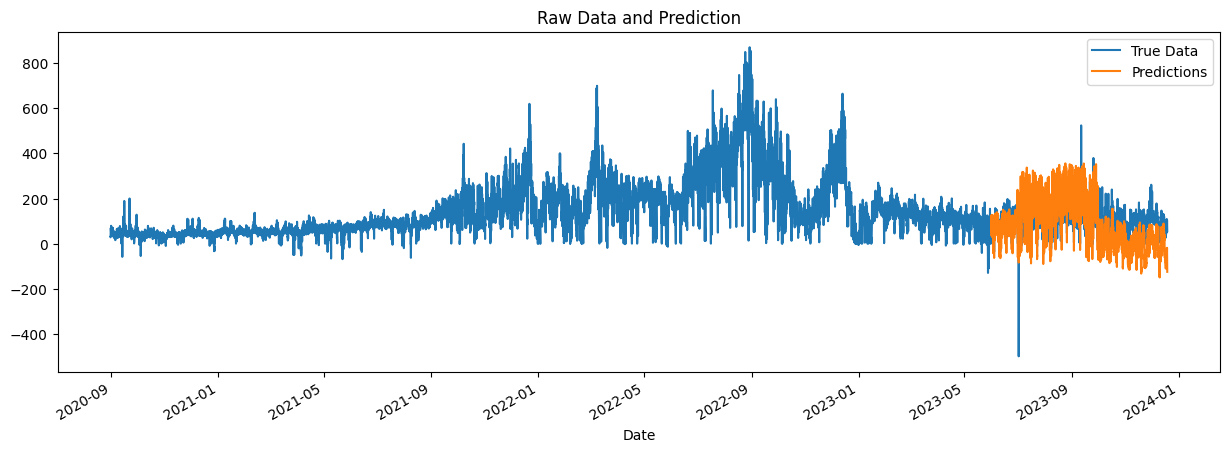

In [163]:
testset['prediction_xgb'] = y_pred_boosted
df = df.merge(testset[['prediction_xgb']], how='left', left_index=True, right_index=True)
ax = df[['price']].plot(figsize=(15, 5))
df['prediction_xgb'].plot(ax=ax, style='-')
plt.legend(['True Data', 'Predictions'])
ax.set_title('Raw Data and Prediction')
plt.show()

C:\Users\Chaitanya Ashtekar\AppData\Local\Temp\ipykernel_7456\3726693426.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainset['prediction_xgb_train'] = y_fit_boosted


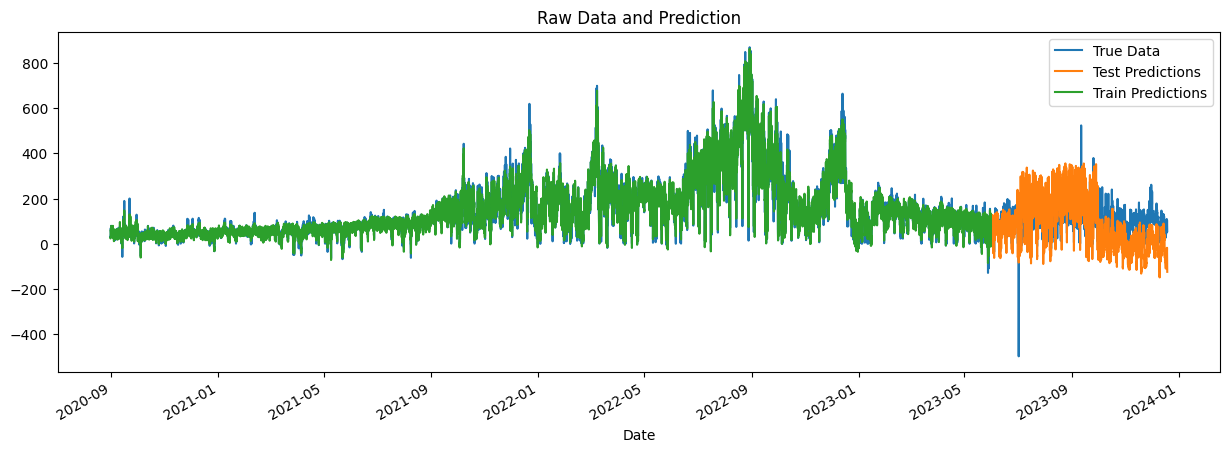

In [165]:
trainset['prediction_xgb_train'] = y_fit_boosted
df_ = df.merge(trainset[['prediction_xgb_train']], how='left', left_index=True, right_index=True)
ax = df_[['price']].plot(figsize=(15, 5))
df_['prediction_xgb'].plot(ax=ax, style='-')
df_["prediction_xgb_train"].plot(ax=ax, style="-")
plt.legend(['True Data', 'Test Predictions', "Train Predictions"])
ax.set_title('Raw Data and Prediction')
plt.show()

In [166]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_fit_boosted, y_train)
mae = mean_absolute_error(y_fit_boosted, y_train)

print(f"MSE for hybrid model: {mse}")
print(f"MAE for hybrid model: {mae}")

MSE for hybrid model: 282.89828346946615
MAE for hybrid model: 11.712432536000945


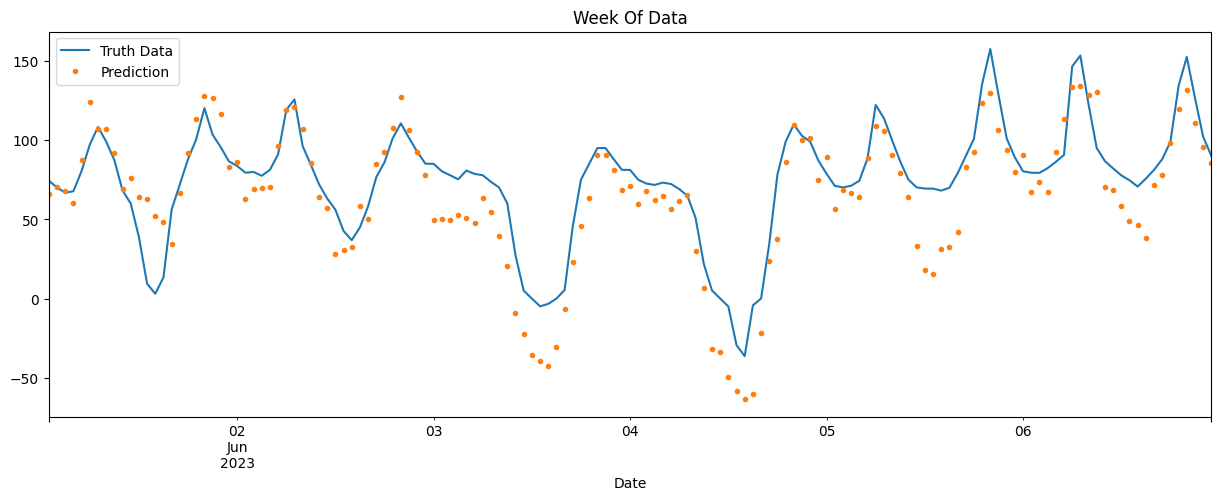

In [167]:
ax = df.loc[(df.index > '06-01-2023') & (df.index < '06-07-2023')]['price'] \
    .plot(figsize=(15, 5), title='Week Of Data')
df.loc[(df.index > '06-01-2023') & (df.index < '06-07-2023')]['prediction_xgb'] \
    .plot(style='.')
plt.legend(['Truth Data','Prediction'])
plt.show()